# Deep Learning Applications: Laboratory #1

In this first laboratory we will work relatively simple architectures to get a feel for working with Deep Models. This notebook is designed to work with PyTorch, but as I said in the introductory lecture: please feel free to use and experiment with whatever tools you like.

**Important Notes**:
1. Be sure to **document** all of your decisions, as well as your intermediate and final results. Make sure your conclusions and analyses are clearly presented. Don't make us dig into your code or walls of printed results to try to draw conclusions from your code.
2. If you use code from someone else (e.g. Github, Stack Overflow, ChatGPT, etc) you **must be transparent about it**. Document your sources and explain how you adapted any partial solutions to creat **your** solution.



## Exercise 1: Warming Up
In this series of exercises I want you to try to duplicate (on a small scale) the results of the ResNet paper:

> [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385), Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun, CVPR 2016.

We will do this in steps using a Multilayer Perceptron on MNIST.

Recall that the main message of the ResNet paper is that **deeper** networks do not **guarantee** more reduction in training loss (or in validation accuracy). Below you will incrementally build a sequence of experiments to verify this for an MLP. A few guidelines:

+ I have provided some **starter** code at the beginning. **NONE** of this code should survive in your solutions. Not only is it **very** badly written, it is also written in my functional style that also obfuscates what it's doing (in part to **discourage** your reuse!). It's just to get you *started*.
+ These exercises ask you to compare **multiple** training runs, so it is **really** important that you factor this into your **pipeline**. Using [Tensorboard](https://pytorch.org/tutorials/recipes/recipes/tensorboard_with_pytorch.html) is a **very** good idea -- or, even better [Weights and Biases](https://wandb.ai/site).
+ You may work and submit your solutions in **groups of at most two**. Share your ideas with everyone, but the solutions you submit *must be your own*.

First some boilerplate to get you started, then on to the actual exercises!

### Preface: Some code to get you started

What follows is some **very simple** code for training an MLP on MNIST. The point of this code is to get you up and running (and to verify that your Python environment has all needed dependencies).

**Note**: As you read through my code and execute it, this would be a good time to think about *abstracting* **your** model definition, and training and evaluation pipelines in order to make it easier to compare performance of different models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.datasets import MNIST
from torchvision.datasets import CIFAR10
from torchvision.datasets import CIFAR100
import torchvision.transforms as transforms
import random
from sklearn.metrics import accuracy_score, classification_report
from torch.utils.data.dataloader import DataLoader

import wandb
import gc 
gc.collect()
torch.cuda.empty_cache()

from myResNet.MyResnet import MyResNet
from Trainer.Trainer import Trainer

In [2]:
wandb_key = ''
wandb.login(key=wandb_key)

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.


True

#### Data preparation

Here is some basic dataset loading, validation splitting code to get you started working with MNIST.

In [3]:
#Data Loading 

# Standard MNIST transform.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)) #i numeri magici di media e varianza di MINST
])

# Load MNIST train and test.
ds_train = MNIST(root='./data', train=True, download=True, transform=transform) 
ds_test = MNIST(root='./data', train=False, download=True, transform=transform)                                           

#### Boilerplate training and evaluation code

This is some **very** rough training, evaluation, and plotting code. Again, just to get you started. I will be *very* disappointed if any of this code makes it into your final submission.

In [4]:
#see Trainer class

#### A basic, parameterized MLP

This is a very basic implementation of a Multilayer Perceptron. Don't waste too much time trying to figure out how it works -- the important detail is that it allows you to pass in a list of input, hidden layer, and output *widths*. **Your** implementation should also support this for the exercises to come.

In [5]:
#seee MyResNet class


### Exercise 1.1: A baseline MLP

Implement a *simple* Multilayer Perceptron to classify the 10 digits of MNIST (e.g. two *narrow* layers). Use my code above as inspiration, but implement your own training pipeline -- you will need it later. Train this model to convergence, monitoring (at least) the loss and accuracy on the training and validation sets for every epoch. Below I include a basic implementation to get you started -- remember that you should write your *own* pipeline!

**Note**: This would be a good time to think about *abstracting* your model definition, and training and evaluation pipelines in order to make it easier to compare performance of different models.

**Important**: Given the *many* runs you will need to do, and the need to *compare* performance between them, this would **also** be a great point to study how **Tensorboard** or **Weights and Biases** can be used for performance monitoring.

In [4]:
trainer_config = {
    "device": 'cuda', 
    "num_workers": 4, 
    "seed": 42
}

MLP = MyResNet(data_shape=[1,28,28], layers_tuple_list=[("Linear", 28*28,64,3,10, "ReLU")])


MLP_trainer = Trainer(config=trainer_config, model=MLP, dataset=ds_train, lr=0.001)
MLP_trainer.train(data_split = [0.2,0.8], batch_size = 256, num_epochs = 25, use_wandb=False, val_check=1, early_stopping=2)

running on device cuda
Initial checks passed succesfully


Training epoch 0: 100%|██████████| 188/188 [00:01<00:00, 128.33it/s]

Epoch 0/25, Average training loss: 0.4786


Epoch 0/25, Training accuracy: 0.9121


Validation epoch 0: 100%|██████████| 47/47 [00:00<00:00, 96.76it/s] 

Epoch 0/25, Average validation loss: 0.3349


Epoch 0/25, Validation accuracy: 0.9060


Training epoch 1: 100%|██████████| 188/188 [00:01<00:00, 132.22it/s]

Epoch 1/25, Average training loss: 0.3025


Epoch 1/25, Training accuracy: 0.9182


Validation epoch 1: 100%|██████████| 47/47 [00:00<00:00, 97.17it/s] 

Epoch 1/25, Average validation loss: 0.3115


Epoch 1/25, Validation accuracy: 0.9099


Training epoch 2: 100%|██████████| 188/188 [00:01<00:00, 128.21it/s]

Epoch 2/25, Average training loss: 0.2888


Epoch 2/25, Training accuracy: 0.9228


Validation epoch 2: 100%|██████████| 47/47 [00:00<00:00, 115.49it/s]

Epoch 2/25, Average validation loss: 0.3080


Epoch 2/25, Validation accuracy: 0.9138


Training epoch 3: 100%|██████████| 188/188 [00:01<00:00, 128.78it/s]

Epoch 3/25, Average training loss: 0.2833


Epoch 3/25, Training accuracy: 0.9248


Validation epoch 3: 100%|██████████| 47/47 [00:00<00:00, 108.13it/s]

Epoch 3/25, Average validation loss: 0.3018


Epoch 3/25, Validation accuracy: 0.9167


Training epoch 4: 100%|██████████| 188/188 [00:01<00:00, 130.44it/s]

Epoch 4/25, Average training loss: 0.2757


Epoch 4/25, Training accuracy: 0.9276


Validation epoch 4: 100%|██████████| 47/47 [00:00<00:00, 103.51it/s]

Epoch 4/25, Average validation loss: 0.3015


Epoch 4/25, Validation accuracy: 0.9156


Training epoch 5: 100%|██████████| 188/188 [00:01<00:00, 131.71it/s]

Epoch 5/25, Average training loss: 0.2737


Epoch 5/25, Training accuracy: 0.9285


Validation epoch 5: 100%|██████████| 47/47 [00:00<00:00, 105.91it/s]

Epoch 5/25, Average validation loss: 0.2939


Epoch 5/25, Validation accuracy: 0.9152


Training epoch 6: 100%|██████████| 188/188 [00:01<00:00, 130.21it/s]

Epoch 6/25, Average training loss: 0.2717


Epoch 6/25, Training accuracy: 0.9291


Validation epoch 6: 100%|██████████| 47/47 [00:00<00:00, 110.68it/s]

Epoch 6/25, Average validation loss: 0.3048


Epoch 6/25, Validation accuracy: 0.9162
Early stopping triggered!


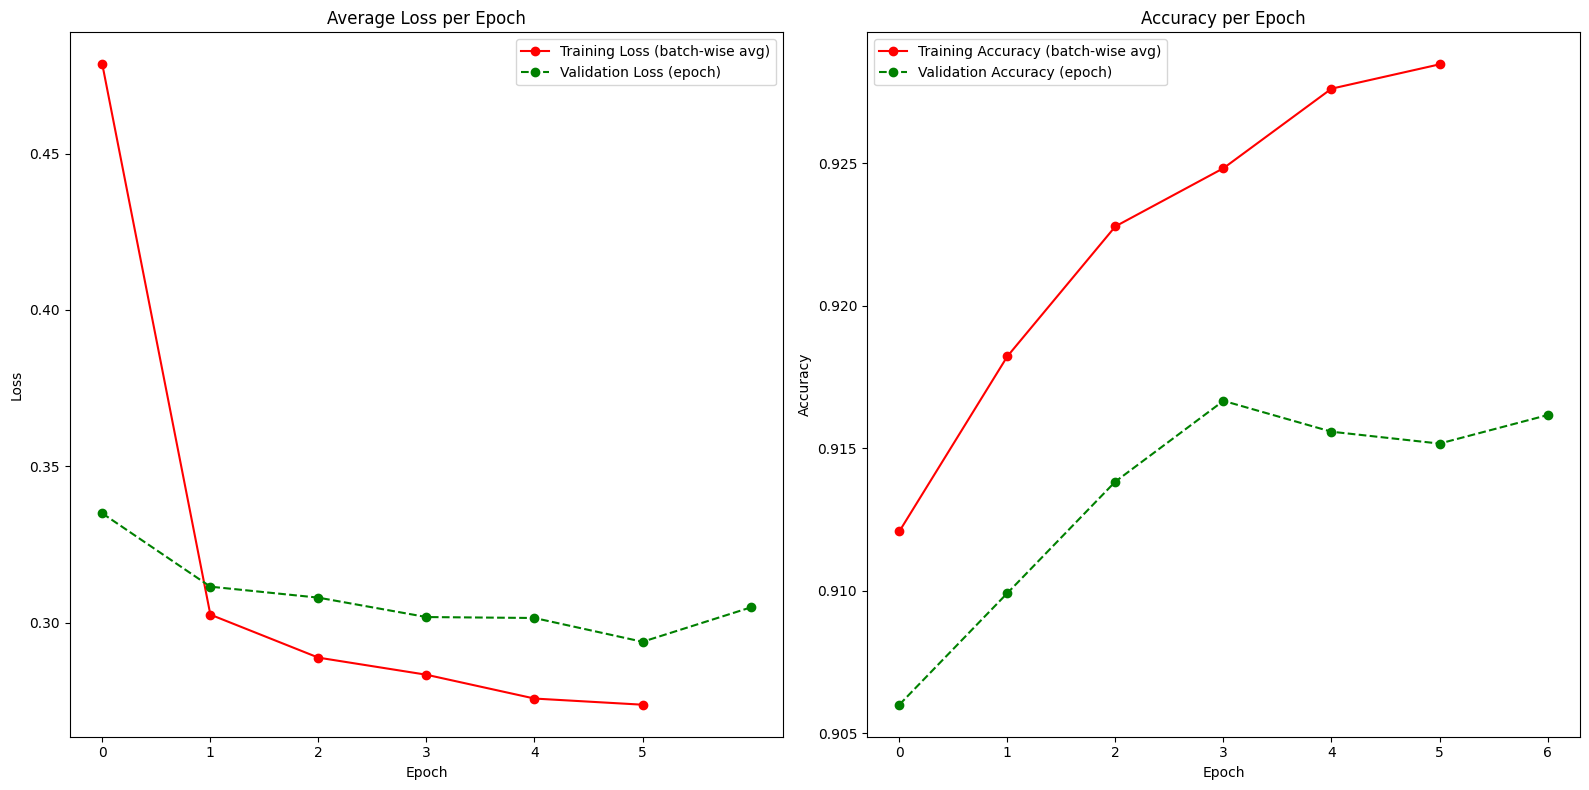

In [5]:
MLP_trainer.plot_curves()

Test set loss: 0.2778, accuracy: 0.9235


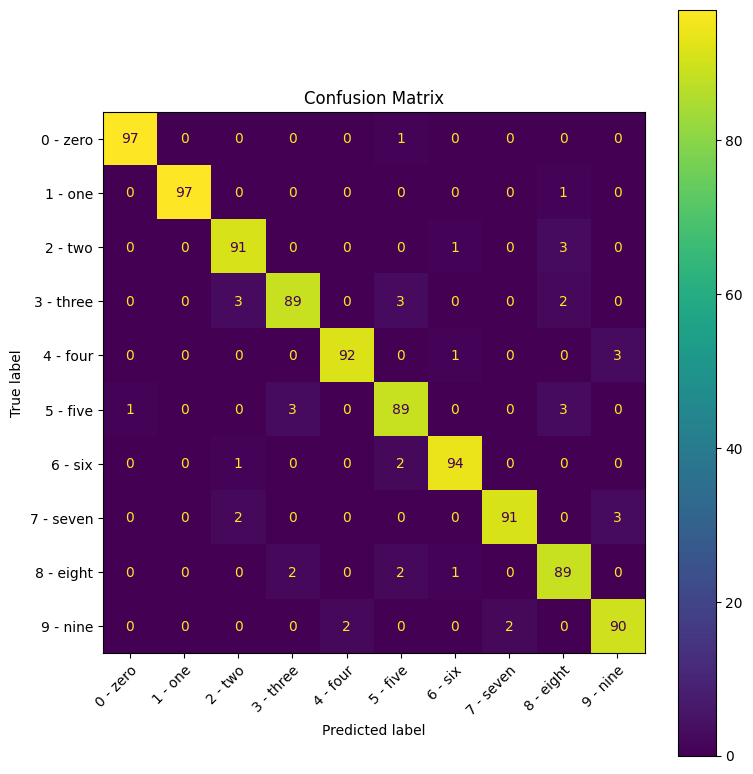

(0.2777834155678749, 0.9235)

In [6]:
MLP.test(dataset=ds_test,plot = True)

In [7]:
del MLP

### Exercise 1.2: Adding Residual Connections

Implement a variant of your parameterized MLP network to support **residual** connections. Your network should be defined as a composition of **residual MLP** blocks that have one or more linear layers and add a skip connection from the block input to the output of the final linear layer.

**Compare** the performance (in training/validation loss and test accuracy) of your MLP and ResidualMLP for a range of depths. Verify that deeper networks **with** residual connections are easier to train than a network of the same depth **without** residual connections.

**For extra style points**: See if you can explain by analyzing the gradient magnitudes on a single training batch *why* this is the case. 

In [ ]:
trainer_config = {
    "device": 'cuda', 
    "num_workers": 4, 
    "seed": 42
}
depths = [3,5,7,9]
no_skip_summaries = list()
no_skip_epochs = list()
no_skip_test_accs = list()
skip_summaries = list()
skip_epochs = list()
skip_test_accs = list()


for depth in depths:
   deep_MLPwith_skip = MyResNet(data_shape=[1,28,28], layers_tuple_list=[("Linear", 28*28,64,depth,10, "ReLU")], skip_dict={0:1,(depth-1):depth})
   deep_MLP_trainer_skip = Trainer(config=trainer_config, model=deep_MLPwith_skip, dataset=ds_train, lr=0.0001)
   deep_MLP_trainer_skip.train(data_split = [0.2,0.8], batch_size = 256, num_epochs = 20, use_wandb=False, val_check = 1, early_stopping = 3)
   loss,acc = deep_MLPwith_skip.test(ds_test)

   skip_summaries.append(deep_MLP_trainer_skip.get_summary())
   skip_epochs.append(len(deep_MLP_trainer_skip.history['train_loss']))
   skip_test_accs.append(acc)

   del deep_MLPwith_skip
   del deep_MLP_trainer_skip

   deep_MLPno_skip = MyResNet(data_shape=[1,28,28], layers_tuple_list=[("Linear", 28*28,64,depth,10, "ReLU")])
   deep_MLP_trainer_no_skip = Trainer(config=trainer_config, model=deep_MLPno_skip, dataset=ds_train, lr=0.0001)
   deep_MLP_trainer_no_skip.train(data_split = [0.2,0.8], batch_size = 256, num_epochs = 20, use_wandb=False, val_check = 1, early_stopping = 3)
   loss,acc = deep_MLPno_skip.test(ds_test)
   
   no_skip_summaries.append(deep_MLP_trainer_no_skip.get_summary())
   no_skip_epochs.append(len(deep_MLP_trainer_no_skip.history['train_loss']))
   no_skip_test_accs.append(acc)
   del deep_MLPno_skip
   del deep_MLP_trainer_no_skip

running on device cuda


/home/tommaso/Documents/deep_learning/deep_learning_utils/src/Trainer/Trainer.py:295: UserWarning: Not uniform initial logits distribution!
  warnings.warn("Not uniform initial logits distribution!")
Training epoch 0: 100%|██████████| 188/188 [00:01<00:00, 138.09it/s]

Epoch 0/20, Average training loss: 1.0555


Epoch 0/20, Training accuracy: 0.8738


Validation epoch 0: 100%|██████████| 47/47 [00:00<00:00, 115.80it/s]

Epoch 0/20, Average validation loss: 0.4931


Epoch 0/20, Validation accuracy: 0.8709


Training epoch 1: 100%|██████████| 188/188 [00:01<00:00, 138.17it/s]

Epoch 1/20, Average training loss: 0.4019


Epoch 1/20, Training accuracy: 0.8992


Training epoch 2: 100%|██████████| 188/188 [00:01<00:00, 139.72it/s]

Epoch 2/20, Average training loss: 0.3323


Epoch 2/20, Training accuracy: 0.9107


Validation epoch 2: 100%|██████████| 47/47 [00:00<00:00, 109.83it/s]

Epoch 2/20, Average validation loss: 0.3319


Epoch 2/20, Validation accuracy: 0.9045


Training epoch 3: 100%|██████████| 188/188 [00:01<00:00, 142.92it/s]

Epoch 3/20, Average training loss: 0.3057


Epoch 3/20, Training accuracy: 0.9162


Training epoch 4: 100%|██████████| 188/188 [00:01<00:00, 144.67it/s]

Epoch 4/20, Average training loss: 0.2922


Epoch 4/20, Training accuracy: 0.9169


Validation epoch 4: 100%|██████████| 47/47 [00:00<00:00, 119.76it/s]

Epoch 4/20, Average validation loss: 0.3102


Epoch 4/20, Validation accuracy: 0.9112


Training epoch 5: 100%|██████████| 188/188 [00:01<00:00, 142.16it/s]

Epoch 5/20, Average training loss: 0.2843


Epoch 5/20, Training accuracy: 0.9205


Training epoch 6: 100%|██████████| 188/188 [00:01<00:00, 135.19it/s]

Epoch 6/20, Average training loss: 0.2787


Epoch 6/20, Training accuracy: 0.9225


Validation epoch 6: 100%|██████████| 47/47 [00:00<00:00, 108.94it/s]

Epoch 6/20, Average validation loss: 0.2976


Epoch 6/20, Validation accuracy: 0.9158


Training epoch 7: 100%|██████████| 188/188 [00:01<00:00, 140.82it/s]

Epoch 7/20, Average training loss: 0.2732


Epoch 7/20, Training accuracy: 0.9248


Training epoch 8: 100%|██████████| 188/188 [00:01<00:00, 133.61it/s]

Epoch 8/20, Average training loss: 0.2695


Epoch 8/20, Training accuracy: 0.9242


Validation epoch 8: 100%|██████████| 47/47 [00:00<00:00, 111.21it/s]

Epoch 8/20, Average validation loss: 0.2964


Epoch 8/20, Validation accuracy: 0.9164


Training epoch 9: 100%|██████████| 188/188 [00:01<00:00, 141.70it/s]

Epoch 9/20, Average training loss: 0.2667


Epoch 9/20, Training accuracy: 0.9267


Training epoch 10: 100%|██████████| 188/188 [00:01<00:00, 131.88it/s]

Epoch 10/20, Average training loss: 0.2645


Epoch 10/20, Training accuracy: 0.9282


Validation epoch 10: 100%|██████████| 47/47 [00:00<00:00, 113.01it/s]

Epoch 10/20, Average validation loss: 0.2921


Epoch 10/20, Validation accuracy: 0.9198


Training epoch 11: 100%|██████████| 188/188 [00:01<00:00, 134.68it/s]

Epoch 11/20, Average training loss: 0.2621


Epoch 11/20, Training accuracy: 0.9265


Training epoch 12: 100%|██████████| 188/188 [00:01<00:00, 141.36it/s]

Epoch 12/20, Average training loss: 0.2596


Epoch 12/20, Training accuracy: 0.9283


Validation epoch 12: 100%|██████████| 47/47 [00:00<00:00, 108.47it/s]

Epoch 12/20, Average validation loss: 0.2881


Epoch 12/20, Validation accuracy: 0.9177


Training epoch 13: 100%|██████████| 188/188 [00:01<00:00, 142.88it/s]

Epoch 13/20, Average training loss: 0.2586


Epoch 13/20, Training accuracy: 0.9280


Training epoch 14: 100%|██████████| 188/188 [00:01<00:00, 131.58it/s]

Epoch 14/20, Average training loss: 0.2565


Epoch 14/20, Training accuracy: 0.9293


Validation epoch 14: 100%|██████████| 47/47 [00:00<00:00, 115.57it/s]

Epoch 14/20, Average validation loss: 0.2889


Epoch 14/20, Validation accuracy: 0.9183


Training epoch 15: 100%|██████████| 188/188 [00:01<00:00, 144.38it/s]

Epoch 15/20, Average training loss: 0.2546


Epoch 15/20, Training accuracy: 0.9309


Training epoch 16: 100%|██████████| 188/188 [00:01<00:00, 142.10it/s]

Epoch 16/20, Average training loss: 0.2544


Epoch 16/20, Training accuracy: 0.9309


Validation epoch 16: 100%|██████████| 47/47 [00:00<00:00, 116.54it/s]

Epoch 16/20, Average validation loss: 0.2878


Epoch 16/20, Validation accuracy: 0.9198


Training epoch 17: 100%|██████████| 188/188 [00:01<00:00, 141.78it/s]

Epoch 17/20, Average training loss: 0.2525


Epoch 17/20, Training accuracy: 0.9313


Training epoch 18: 100%|██████████| 188/188 [00:01<00:00, 142.39it/s]

Epoch 18/20, Average training loss: 0.2512


Epoch 18/20, Training accuracy: 0.9312


Validation epoch 18: 100%|██████████| 47/47 [00:00<00:00, 112.11it/s]

Epoch 18/20, Average validation loss: 0.2885


Epoch 18/20, Validation accuracy: 0.9182


Training epoch 19: 100%|██████████| 188/188 [00:01<00:00, 139.08it/s]

Epoch 19/20, Average training loss: 0.2502


Epoch 19/20, Training accuracy: 0.9319
Test set loss: 0.2695, accuracy: 0.9230
running on device cuda


Training epoch 0: 100%|██████████| 188/188 [00:01<00:00, 142.63it/s]

Epoch 0/20, Average training loss: 1.3572


Epoch 0/20, Training accuracy: 0.8407


Validation epoch 0: 100%|██████████| 47/47 [00:00<00:00, 119.52it/s]

Epoch 0/20, Average validation loss: 0.6549


Epoch 0/20, Validation accuracy: 0.8361


Training epoch 1: 100%|██████████| 188/188 [00:01<00:00, 135.41it/s]

Epoch 1/20, Average training loss: 0.4899


Epoch 1/20, Training accuracy: 0.8901


Training epoch 2: 100%|██████████| 188/188 [00:01<00:00, 137.43it/s]

Epoch 2/20, Average training loss: 0.3647


Epoch 2/20, Training accuracy: 0.9038


Validation epoch 2: 100%|██████████| 47/47 [00:00<00:00, 111.12it/s]

Epoch 2/20, Average validation loss: 0.3524


Epoch 2/20, Validation accuracy: 0.8990


Training epoch 3: 100%|██████████| 188/188 [00:01<00:00, 143.55it/s]

Epoch 3/20, Average training loss: 0.3251


Epoch 3/20, Training accuracy: 0.9109


Training epoch 4: 100%|██████████| 188/188 [00:01<00:00, 142.44it/s]

Epoch 4/20, Average training loss: 0.3063


Epoch 4/20, Training accuracy: 0.9143


Validation epoch 4: 100%|██████████| 47/47 [00:00<00:00, 116.68it/s]

Epoch 4/20, Average validation loss: 0.3191


Epoch 4/20, Validation accuracy: 0.9087


Training epoch 5: 100%|██████████| 188/188 [00:01<00:00, 140.22it/s]

Epoch 5/20, Average training loss: 0.2955


Epoch 5/20, Training accuracy: 0.9163


Training epoch 6: 100%|██████████| 188/188 [00:01<00:00, 133.43it/s]

Epoch 6/20, Average training loss: 0.2882


Epoch 6/20, Training accuracy: 0.9189


Validation epoch 6: 100%|██████████| 47/47 [00:00<00:00, 114.80it/s]

Epoch 6/20, Average validation loss: 0.3044


Epoch 6/20, Validation accuracy: 0.9123


Training epoch 7: 100%|██████████| 188/188 [00:01<00:00, 140.52it/s]

Epoch 7/20, Average training loss: 0.2818


Epoch 7/20, Training accuracy: 0.9215


Training epoch 8: 100%|██████████| 188/188 [00:01<00:00, 143.12it/s]

Epoch 8/20, Average training loss: 0.2774


Epoch 8/20, Training accuracy: 0.9219


Validation epoch 8: 100%|██████████| 47/47 [00:00<00:00, 119.71it/s]

Epoch 8/20, Average validation loss: 0.2994


Epoch 8/20, Validation accuracy: 0.9160


Training epoch 9: 100%|██████████| 188/188 [00:01<00:00, 135.48it/s]

Epoch 9/20, Average training loss: 0.2741


Epoch 9/20, Training accuracy: 0.9241


Training epoch 10: 100%|██████████| 188/188 [00:01<00:00, 144.25it/s]

Epoch 10/20, Average training loss: 0.2715


Epoch 10/20, Training accuracy: 0.9249


Validation epoch 10: 100%|██████████| 47/47 [00:00<00:00, 111.38it/s]

Epoch 10/20, Average validation loss: 0.2963


Epoch 10/20, Validation accuracy: 0.9180


Training epoch 11: 100%|██████████| 188/188 [00:01<00:00, 139.13it/s]

Epoch 11/20, Average training loss: 0.2684


Epoch 11/20, Training accuracy: 0.9252


Training epoch 12: 100%|██████████| 188/188 [00:01<00:00, 140.49it/s]

Epoch 12/20, Average training loss: 0.2659


Epoch 12/20, Training accuracy: 0.9264


Validation epoch 12: 100%|██████████| 47/47 [00:00<00:00, 117.69it/s]

Epoch 12/20, Average validation loss: 0.2920


Epoch 12/20, Validation accuracy: 0.9173


Training epoch 13: 100%|██████████| 188/188 [00:01<00:00, 141.87it/s]

Epoch 13/20, Average training loss: 0.2645


Epoch 13/20, Training accuracy: 0.9268


Training epoch 14: 100%|██████████| 188/188 [00:01<00:00, 142.23it/s]

Epoch 14/20, Average training loss: 0.2625


Epoch 14/20, Training accuracy: 0.9274


Validation epoch 14: 100%|██████████| 47/47 [00:00<00:00, 114.23it/s]

Epoch 14/20, Average validation loss: 0.2909


Epoch 14/20, Validation accuracy: 0.9190


Training epoch 15: 100%|██████████| 188/188 [00:01<00:00, 141.86it/s]

Epoch 15/20, Average training loss: 0.2604


Epoch 15/20, Training accuracy: 0.9281


Training epoch 16: 100%|██████████| 188/188 [00:01<00:00, 139.79it/s]

Epoch 16/20, Average training loss: 0.2598


Epoch 16/20, Training accuracy: 0.9294


Validation epoch 16: 100%|██████████| 47/47 [00:00<00:00, 113.73it/s]

Epoch 16/20, Average validation loss: 0.2892


Epoch 16/20, Validation accuracy: 0.9187


Training epoch 17: 100%|██████████| 188/188 [00:01<00:00, 142.41it/s]

Epoch 17/20, Average training loss: 0.2580


Epoch 17/20, Training accuracy: 0.9285


Training epoch 18: 100%|██████████| 188/188 [00:01<00:00, 138.00it/s]

Epoch 18/20, Average training loss: 0.2567


Epoch 18/20, Training accuracy: 0.9290


Validation epoch 18: 100%|██████████| 47/47 [00:00<00:00, 113.49it/s]

Epoch 18/20, Average validation loss: 0.2909


Epoch 18/20, Validation accuracy: 0.9174


Training epoch 19: 100%|██████████| 188/188 [00:01<00:00, 143.99it/s]

Epoch 19/20, Average training loss: 0.2554


Epoch 19/20, Training accuracy: 0.9293
Test set loss: 0.2701, accuracy: 0.9211
running on device cuda


/home/tommaso/Documents/deep_learning/deep_learning_utils/src/Trainer/Trainer.py:311: UserWarning: Couldn't overfit on small dataset!
  warnings.warn("Couldn't overfit on small dataset!")
Training epoch 0: 100%|██████████| 188/188 [00:01<00:00, 133.38it/s]

Epoch 0/20, Average training loss: 1.1910


Epoch 0/20, Training accuracy: 0.8606


Validation epoch 0: 100%|██████████| 47/47 [00:00<00:00, 105.68it/s]

Epoch 0/20, Average validation loss: 0.5031


Epoch 0/20, Validation accuracy: 0.8542


Training epoch 1: 100%|██████████| 188/188 [00:01<00:00, 133.37it/s]

Epoch 1/20, Average training loss: 0.4049


Epoch 1/20, Training accuracy: 0.8974


Training epoch 2: 100%|██████████| 188/188 [00:01<00:00, 132.08it/s]

Epoch 2/20, Average training loss: 0.3401


Epoch 2/20, Training accuracy: 0.9091


Validation epoch 2: 100%|██████████| 47/47 [00:00<00:00, 112.12it/s]

Epoch 2/20, Average validation loss: 0.3414


Epoch 2/20, Validation accuracy: 0.9032


Training epoch 3: 100%|██████████| 188/188 [00:01<00:00, 138.28it/s]


Epoch 3/20, Average training loss: 0.3140
Epoch 3/20, Training accuracy: 0.9139


Training epoch 4: 100%|██████████| 188/188 [00:01<00:00, 132.03it/s]

Epoch 4/20, Average training loss: 0.2993


Epoch 4/20, Training accuracy: 0.9157


Validation epoch 4: 100%|██████████| 47/47 [00:00<00:00, 114.78it/s]


Epoch 4/20, Average validation loss: 0.3173
Epoch 4/20, Validation accuracy: 0.9079


Training epoch 5: 100%|██████████| 188/188 [00:01<00:00, 133.57it/s]

Epoch 5/20, Average training loss: 0.2894


Epoch 5/20, Training accuracy: 0.9191


Training epoch 6: 100%|██████████| 188/188 [00:01<00:00, 131.48it/s]

Epoch 6/20, Average training loss: 0.2824


Epoch 6/20, Training accuracy: 0.9205


Validation epoch 6: 100%|██████████| 47/47 [00:00<00:00, 115.12it/s]

Epoch 6/20, Average validation loss: 0.3024


Epoch 6/20, Validation accuracy: 0.9129


Training epoch 7: 100%|██████████| 188/188 [00:01<00:00, 137.44it/s]

Epoch 7/20, Average training loss: 0.2763


Epoch 7/20, Training accuracy: 0.9231


Training epoch 8: 100%|██████████| 188/188 [00:01<00:00, 129.15it/s]

Epoch 8/20, Average training loss: 0.2718


Epoch 8/20, Training accuracy: 0.9234


Validation epoch 8: 100%|██████████| 47/47 [00:00<00:00, 102.69it/s]

Epoch 8/20, Average validation loss: 0.2981


Epoch 8/20, Validation accuracy: 0.9153


Training epoch 9: 100%|██████████| 188/188 [00:01<00:00, 133.83it/s]

Epoch 9/20, Average training loss: 0.2688


Epoch 9/20, Training accuracy: 0.9262


Training epoch 10: 100%|██████████| 188/188 [00:01<00:00, 127.84it/s]

Epoch 10/20, Average training loss: 0.2665


Epoch 10/20, Training accuracy: 0.9268


Validation epoch 10: 100%|██████████| 47/47 [00:00<00:00, 112.54it/s]

Epoch 10/20, Average validation loss: 0.2937


Epoch 10/20, Validation accuracy: 0.9171


Training epoch 11: 100%|██████████| 188/188 [00:01<00:00, 137.91it/s]

Epoch 11/20, Average training loss: 0.2639


Epoch 11/20, Training accuracy: 0.9250


Training epoch 12: 100%|██████████| 188/188 [00:01<00:00, 133.70it/s]

Epoch 12/20, Average training loss: 0.2614


Epoch 12/20, Training accuracy: 0.9287


Validation epoch 12: 100%|██████████| 47/47 [00:00<00:00, 118.11it/s]

Epoch 12/20, Average validation loss: 0.2901


Epoch 12/20, Validation accuracy: 0.9169


Training epoch 13: 100%|██████████| 188/188 [00:01<00:00, 135.85it/s]

Epoch 13/20, Average training loss: 0.2604


Epoch 13/20, Training accuracy: 0.9278


Training epoch 14: 100%|██████████| 188/188 [00:01<00:00, 132.17it/s]

Epoch 14/20, Average training loss: 0.2579


Epoch 14/20, Training accuracy: 0.9286


Validation epoch 14: 100%|██████████| 47/47 [00:00<00:00, 109.43it/s]

Epoch 14/20, Average validation loss: 0.2921


Epoch 14/20, Validation accuracy: 0.9167


Training epoch 15: 100%|██████████| 188/188 [00:01<00:00, 132.50it/s]

Epoch 15/20, Average training loss: 0.2558


Epoch 15/20, Training accuracy: 0.9303


Training epoch 16: 100%|██████████| 188/188 [00:01<00:00, 135.77it/s]

Epoch 16/20, Average training loss: 0.2558


Epoch 16/20, Training accuracy: 0.9305


Validation epoch 16: 100%|██████████| 47/47 [00:00<00:00, 113.19it/s]

Epoch 16/20, Average validation loss: 0.2895


Epoch 16/20, Validation accuracy: 0.9181


Training epoch 17: 100%|██████████| 188/188 [00:01<00:00, 129.54it/s]

Epoch 17/20, Average training loss: 0.2539


Epoch 17/20, Training accuracy: 0.9307


Training epoch 18: 100%|██████████| 188/188 [00:01<00:00, 136.61it/s]

Epoch 18/20, Average training loss: 0.2524


Epoch 18/20, Training accuracy: 0.9314


Validation epoch 18: 100%|██████████| 47/47 [00:00<00:00, 108.69it/s]

Epoch 18/20, Average validation loss: 0.2895


Epoch 18/20, Validation accuracy: 0.9184


Training epoch 19: 100%|██████████| 188/188 [00:01<00:00, 132.04it/s]

Epoch 19/20, Average training loss: 0.2517


Epoch 19/20, Training accuracy: 0.9314
Test set loss: 0.2719, accuracy: 0.9206
running on device cuda


Training epoch 0: 100%|██████████| 188/188 [00:01<00:00, 140.00it/s]

Epoch 0/20, Average training loss: 1.4244


Epoch 0/20, Training accuracy: 0.7955


Validation epoch 0: 100%|██████████| 47/47 [00:00<00:00, 113.95it/s]

Epoch 0/20, Average validation loss: 0.6689


Epoch 0/20, Validation accuracy: 0.7927


Training epoch 1: 100%|██████████| 188/188 [00:01<00:00, 143.30it/s]

Epoch 1/20, Average training loss: 0.5212


Epoch 1/20, Training accuracy: 0.8765


Training epoch 2: 100%|██████████| 188/188 [00:01<00:00, 144.28it/s]

Epoch 2/20, Average training loss: 0.3937


Epoch 2/20, Training accuracy: 0.8971


Validation epoch 2: 100%|██████████| 47/47 [00:00<00:00, 106.59it/s]

Epoch 2/20, Average validation loss: 0.3824


Epoch 2/20, Validation accuracy: 0.8910


Training epoch 3: 100%|██████████| 188/188 [00:01<00:00, 140.01it/s]

Epoch 3/20, Average training loss: 0.3542


Epoch 3/20, Training accuracy: 0.9033


Training epoch 4: 100%|██████████| 188/188 [00:01<00:00, 140.57it/s]

Epoch 4/20, Average training loss: 0.3352


Epoch 4/20, Training accuracy: 0.9069


Validation epoch 4: 100%|██████████| 47/47 [00:00<00:00, 118.07it/s]

Epoch 4/20, Average validation loss: 0.3474


Epoch 4/20, Validation accuracy: 0.9008


Training epoch 5: 100%|██████████| 188/188 [00:01<00:00, 143.08it/s]

Epoch 5/20, Average training loss: 0.3225


Epoch 5/20, Training accuracy: 0.9109


Training epoch 6: 100%|██████████| 188/188 [00:01<00:00, 138.16it/s]

Epoch 6/20, Average training loss: 0.3127


Epoch 6/20, Training accuracy: 0.9134


Validation epoch 6: 100%|██████████| 47/47 [00:00<00:00, 111.68it/s]

Epoch 6/20, Average validation loss: 0.3275


Epoch 6/20, Validation accuracy: 0.9071


Training epoch 7: 100%|██████████| 188/188 [00:01<00:00, 140.88it/s]

Epoch 7/20, Average training loss: 0.3029


Epoch 7/20, Training accuracy: 0.9170


Training epoch 8: 100%|██████████| 188/188 [00:01<00:00, 140.67it/s]

Epoch 8/20, Average training loss: 0.2948


Epoch 8/20, Training accuracy: 0.9189


Validation epoch 8: 100%|██████████| 47/47 [00:00<00:00, 109.74it/s]

Epoch 8/20, Average validation loss: 0.3146


Epoch 8/20, Validation accuracy: 0.9127


Training epoch 9: 100%|██████████| 188/188 [00:01<00:00, 139.31it/s]

Epoch 9/20, Average training loss: 0.2879


Epoch 9/20, Training accuracy: 0.9214


Training epoch 10: 100%|██████████| 188/188 [00:01<00:00, 143.39it/s]

Epoch 10/20, Average training loss: 0.2822


Epoch 10/20, Training accuracy: 0.9227


Validation epoch 10: 100%|██████████| 47/47 [00:00<00:00, 110.44it/s]

Epoch 10/20, Average validation loss: 0.3033


Epoch 10/20, Validation accuracy: 0.9162


Training epoch 11: 100%|██████████| 188/188 [00:01<00:00, 136.14it/s]

Epoch 11/20, Average training loss: 0.2767


Epoch 11/20, Training accuracy: 0.9236


Training epoch 12: 100%|██████████| 188/188 [00:01<00:00, 140.89it/s]

Epoch 12/20, Average training loss: 0.2724


Epoch 12/20, Training accuracy: 0.9244


Validation epoch 12: 100%|██████████| 47/47 [00:00<00:00, 115.38it/s]

Epoch 12/20, Average validation loss: 0.2978


Epoch 12/20, Validation accuracy: 0.9148


Training epoch 13: 100%|██████████| 188/188 [00:01<00:00, 142.49it/s]

Epoch 13/20, Average training loss: 0.2696


Epoch 13/20, Training accuracy: 0.9249


Training epoch 14: 100%|██████████| 188/188 [00:01<00:00, 139.54it/s]

Epoch 14/20, Average training loss: 0.2665


Epoch 14/20, Training accuracy: 0.9263


Validation epoch 14: 100%|██████████| 47/47 [00:00<00:00, 114.23it/s]

Epoch 14/20, Average validation loss: 0.2954


Epoch 14/20, Validation accuracy: 0.9171


Training epoch 15: 100%|██████████| 188/188 [00:01<00:00, 141.68it/s]

Epoch 15/20, Average training loss: 0.2638


Epoch 15/20, Training accuracy: 0.9273


Training epoch 16: 100%|██████████| 188/188 [00:01<00:00, 138.20it/s]

Epoch 16/20, Average training loss: 0.2628


Epoch 16/20, Training accuracy: 0.9278


Validation epoch 16: 100%|██████████| 47/47 [00:00<00:00, 118.07it/s]

Epoch 16/20, Average validation loss: 0.2925


Epoch 16/20, Validation accuracy: 0.9187


Training epoch 17: 100%|██████████| 188/188 [00:01<00:00, 146.76it/s]

Epoch 17/20, Average training loss: 0.2605


Epoch 17/20, Training accuracy: 0.9279


Training epoch 18: 100%|██████████| 188/188 [00:01<00:00, 138.84it/s]

Epoch 18/20, Average training loss: 0.2588


Epoch 18/20, Training accuracy: 0.9283


Validation epoch 18: 100%|██████████| 47/47 [00:00<00:00, 114.16it/s]

Epoch 18/20, Average validation loss: 0.2931


Epoch 18/20, Validation accuracy: 0.9179


Training epoch 19: 100%|██████████| 188/188 [00:01<00:00, 135.60it/s]

Epoch 19/20, Average training loss: 0.2576


Epoch 19/20, Training accuracy: 0.9284
Test set loss: 0.2735, accuracy: 0.9216
running on device cuda


Training epoch 0: 100%|██████████| 188/188 [00:01<00:00, 137.67it/s]

Epoch 0/20, Average training loss: 1.3047


Epoch 0/20, Training accuracy: 0.8203


Validation epoch 0: 100%|██████████| 47/47 [00:00<00:00, 112.53it/s]

Epoch 0/20, Average validation loss: 0.5988


Epoch 0/20, Validation accuracy: 0.8171


Training epoch 1: 100%|██████████| 188/188 [00:01<00:00, 143.45it/s]

Epoch 1/20, Average training loss: 0.4597


Epoch 1/20, Training accuracy: 0.8855


Training epoch 2: 100%|██████████| 188/188 [00:01<00:00, 132.75it/s]

Epoch 2/20, Average training loss: 0.3668


Epoch 2/20, Training accuracy: 0.9004


Validation epoch 2: 100%|██████████| 47/47 [00:00<00:00, 116.58it/s]

Epoch 2/20, Average validation loss: 0.3658


Epoch 2/20, Validation accuracy: 0.8962


Training epoch 3: 100%|██████████| 188/188 [00:01<00:00, 145.95it/s]

Epoch 3/20, Average training loss: 0.3420


Epoch 3/20, Training accuracy: 0.9053


Training epoch 4: 100%|██████████| 188/188 [00:01<00:00, 147.19it/s]

Epoch 4/20, Average training loss: 0.3305


Epoch 4/20, Training accuracy: 0.9078


Validation epoch 4: 100%|██████████| 47/47 [00:00<00:00, 121.34it/s]

Epoch 4/20, Average validation loss: 0.3482


Epoch 4/20, Validation accuracy: 0.9014


Training epoch 5: 100%|██████████| 188/188 [00:01<00:00, 150.43it/s]

Epoch 5/20, Average training loss: 0.3219


Epoch 5/20, Training accuracy: 0.9106


Training epoch 6: 100%|██████████| 188/188 [00:01<00:00, 143.20it/s]

Epoch 6/20, Average training loss: 0.3153


Epoch 6/20, Training accuracy: 0.9125


Validation epoch 6: 100%|██████████| 47/47 [00:00<00:00, 115.10it/s]

Epoch 6/20, Average validation loss: 0.3357


Epoch 6/20, Validation accuracy: 0.9088


Training epoch 7: 100%|██████████| 188/188 [00:01<00:00, 142.69it/s]

Epoch 7/20, Average training loss: 0.3081


Epoch 7/20, Training accuracy: 0.9161


Training epoch 8: 100%|██████████| 188/188 [00:01<00:00, 139.76it/s]

Epoch 8/20, Average training loss: 0.3017


Epoch 8/20, Training accuracy: 0.9172


Validation epoch 8: 100%|██████████| 47/47 [00:00<00:00, 116.04it/s]

Epoch 8/20, Average validation loss: 0.3246


Epoch 8/20, Validation accuracy: 0.9116


Training epoch 9: 100%|██████████| 188/188 [00:01<00:00, 146.67it/s]

Epoch 9/20, Average training loss: 0.2949


Epoch 9/20, Training accuracy: 0.9205


Training epoch 10: 100%|██████████| 188/188 [00:01<00:00, 144.54it/s]

Epoch 10/20, Average training loss: 0.2884


Epoch 10/20, Training accuracy: 0.9229


Validation epoch 10: 100%|██████████| 47/47 [00:00<00:00, 124.04it/s]

Epoch 10/20, Average validation loss: 0.3119


Epoch 10/20, Validation accuracy: 0.9149


Training epoch 11: 100%|██████████| 188/188 [00:01<00:00, 142.96it/s]

Epoch 11/20, Average training loss: 0.2823


Epoch 11/20, Training accuracy: 0.9215


Training epoch 12: 100%|██████████| 188/188 [00:01<00:00, 137.53it/s]

Epoch 12/20, Average training loss: 0.2775


Epoch 12/20, Training accuracy: 0.9244


Validation epoch 12: 100%|██████████| 47/47 [00:00<00:00, 118.61it/s]

Epoch 12/20, Average validation loss: 0.3041


Epoch 12/20, Validation accuracy: 0.9147


Training epoch 13: 100%|██████████| 188/188 [00:01<00:00, 146.15it/s]

Epoch 13/20, Average training loss: 0.2740


Epoch 13/20, Training accuracy: 0.9241


Training epoch 14: 100%|██████████| 188/188 [00:01<00:00, 137.22it/s]

Epoch 14/20, Average training loss: 0.2698


Epoch 14/20, Training accuracy: 0.9249


Validation epoch 14: 100%|██████████| 47/47 [00:00<00:00, 120.13it/s]

Epoch 14/20, Average validation loss: 0.3032


Epoch 14/20, Validation accuracy: 0.9156


Training epoch 15: 100%|██████████| 188/188 [00:01<00:00, 135.44it/s]

Epoch 15/20, Average training loss: 0.2659


Epoch 15/20, Training accuracy: 0.9272


Training epoch 16: 100%|██████████| 188/188 [00:01<00:00, 134.77it/s]

Epoch 16/20, Average training loss: 0.2641


Epoch 16/20, Training accuracy: 0.9286


Validation epoch 16: 100%|██████████| 47/47 [00:00<00:00, 117.45it/s]

Epoch 16/20, Average validation loss: 0.2954


Epoch 16/20, Validation accuracy: 0.9173


Training epoch 17: 100%|██████████| 188/188 [00:01<00:00, 142.30it/s]

Epoch 17/20, Average training loss: 0.2616


Epoch 17/20, Training accuracy: 0.9278


Training epoch 18: 100%|██████████| 188/188 [00:01<00:00, 140.10it/s]

Epoch 18/20, Average training loss: 0.2595


Epoch 18/20, Training accuracy: 0.9286


Validation epoch 18: 100%|██████████| 47/47 [00:00<00:00, 121.82it/s]

Epoch 18/20, Average validation loss: 0.2949


Epoch 18/20, Validation accuracy: 0.9193


Training epoch 19: 100%|██████████| 188/188 [00:01<00:00, 139.12it/s]

Epoch 19/20, Average training loss: 0.2580


Epoch 19/20, Training accuracy: 0.9288
Test set loss: 0.2758, accuracy: 0.9219
running on device cuda


Training epoch 0: 100%|██████████| 188/188 [00:01<00:00, 143.19it/s]

Epoch 0/20, Average training loss: 1.4987


Epoch 0/20, Training accuracy: 0.7635


Validation epoch 0: 100%|██████████| 47/47 [00:00<00:00, 120.22it/s]

Epoch 0/20, Average validation loss: 0.7219


Epoch 0/20, Validation accuracy: 0.7682


Training epoch 1: 100%|██████████| 188/188 [00:01<00:00, 144.37it/s]

Epoch 1/20, Average training loss: 0.6188


Epoch 1/20, Training accuracy: 0.8324


Training epoch 2: 100%|██████████| 188/188 [00:01<00:00, 140.05it/s]

Epoch 2/20, Average training loss: 0.5181


Epoch 2/20, Training accuracy: 0.8588


Validation epoch 2: 100%|██████████| 47/47 [00:00<00:00, 119.08it/s]

Epoch 2/20, Average validation loss: 0.5022


Epoch 2/20, Validation accuracy: 0.8552


Training epoch 3: 100%|██████████| 188/188 [00:01<00:00, 137.03it/s]

Epoch 3/20, Average training loss: 0.4623


Epoch 3/20, Training accuracy: 0.8782


Training epoch 4: 100%|██████████| 188/188 [00:01<00:00, 142.88it/s]

Epoch 4/20, Average training loss: 0.4065


Epoch 4/20, Training accuracy: 0.8904


Validation epoch 4: 100%|██████████| 47/47 [00:00<00:00, 112.05it/s]

Epoch 4/20, Average validation loss: 0.4034


Epoch 4/20, Validation accuracy: 0.8852


Training epoch 5: 100%|██████████| 188/188 [00:01<00:00, 146.67it/s]

Epoch 5/20, Average training loss: 0.3779


Epoch 5/20, Training accuracy: 0.8941


Training epoch 6: 100%|██████████| 188/188 [00:01<00:00, 141.03it/s]

Epoch 6/20, Average training loss: 0.3598


Epoch 6/20, Training accuracy: 0.9005


Validation epoch 6: 100%|██████████| 47/47 [00:00<00:00, 117.03it/s]

Epoch 6/20, Average validation loss: 0.3658


Epoch 6/20, Validation accuracy: 0.8982


Training epoch 7: 100%|██████████| 188/188 [00:01<00:00, 146.63it/s]

Epoch 7/20, Average training loss: 0.3426


Epoch 7/20, Training accuracy: 0.9052


Training epoch 8: 100%|██████████| 188/188 [00:01<00:00, 141.12it/s]

Epoch 8/20, Average training loss: 0.3308


Epoch 8/20, Training accuracy: 0.9083


Validation epoch 8: 100%|██████████| 47/47 [00:00<00:00, 119.23it/s]

Epoch 8/20, Average validation loss: 0.3455


Epoch 8/20, Validation accuracy: 0.9024


Training epoch 9: 100%|██████████| 188/188 [00:01<00:00, 141.04it/s]

Epoch 9/20, Average training loss: 0.3224


Epoch 9/20, Training accuracy: 0.9119


Training epoch 10: 100%|██████████| 188/188 [00:01<00:00, 141.83it/s]

Epoch 10/20, Average training loss: 0.3162


Epoch 10/20, Training accuracy: 0.9146


Validation epoch 10: 100%|██████████| 47/47 [00:00<00:00, 121.78it/s]

Epoch 10/20, Average validation loss: 0.3335


Epoch 10/20, Validation accuracy: 0.9090


Training epoch 11: 100%|██████████| 188/188 [00:01<00:00, 141.23it/s]

Epoch 11/20, Average training loss: 0.3086


Epoch 11/20, Training accuracy: 0.9135


Training epoch 12: 100%|██████████| 188/188 [00:01<00:00, 141.09it/s]

Epoch 12/20, Average training loss: 0.3025


Epoch 12/20, Training accuracy: 0.9164


Validation epoch 12: 100%|██████████| 47/47 [00:00<00:00, 109.26it/s]

Epoch 12/20, Average validation loss: 0.3232


Epoch 12/20, Validation accuracy: 0.9086


Training epoch 13: 100%|██████████| 188/188 [00:01<00:00, 141.24it/s]

Epoch 13/20, Average training loss: 0.2974


Epoch 13/20, Training accuracy: 0.9171


Training epoch 14: 100%|██████████| 188/188 [00:01<00:00, 143.20it/s]

Epoch 14/20, Average training loss: 0.2932


Epoch 14/20, Training accuracy: 0.9187


Validation epoch 14: 100%|██████████| 47/47 [00:00<00:00, 118.15it/s]

Epoch 14/20, Average validation loss: 0.3217


Epoch 14/20, Validation accuracy: 0.9082


Training epoch 15: 100%|██████████| 188/188 [00:01<00:00, 147.89it/s]


Epoch 15/20, Average training loss: 0.2893
Epoch 15/20, Training accuracy: 0.9201


Training epoch 16: 100%|██████████| 188/188 [00:01<00:00, 143.12it/s]

Epoch 16/20, Average training loss: 0.2880


Epoch 16/20, Training accuracy: 0.9217


Validation epoch 16: 100%|██████████| 47/47 [00:00<00:00, 117.72it/s]

Epoch 16/20, Average validation loss: 0.3154


Epoch 16/20, Validation accuracy: 0.9111


Training epoch 17: 100%|██████████| 188/188 [00:01<00:00, 142.81it/s]

Epoch 17/20, Average training loss: 0.2849


Epoch 17/20, Training accuracy: 0.9222


Training epoch 18: 100%|██████████| 188/188 [00:01<00:00, 145.07it/s]

Epoch 18/20, Average training loss: 0.2829


Epoch 18/20, Training accuracy: 0.9226


Validation epoch 18: 100%|██████████| 47/47 [00:00<00:00, 118.76it/s]

Epoch 18/20, Average validation loss: 0.3145


Epoch 18/20, Validation accuracy: 0.9114


Training epoch 19: 100%|██████████| 188/188 [00:01<00:00, 134.85it/s]

Epoch 19/20, Average training loss: 0.2812


Epoch 19/20, Training accuracy: 0.9233
Test set loss: 0.2997, accuracy: 0.9174
running on device cuda


Training epoch 0: 100%|██████████| 188/188 [00:01<00:00, 140.28it/s]

Epoch 0/20, Average training loss: 1.3941


Epoch 0/20, Training accuracy: 0.7943


Validation epoch 0: 100%|██████████| 47/47 [00:00<00:00, 118.37it/s]

Epoch 0/20, Average validation loss: 0.6596


Epoch 0/20, Validation accuracy: 0.7903


Training epoch 1: 100%|██████████| 188/188 [00:01<00:00, 142.35it/s]

Epoch 1/20, Average training loss: 0.5369


Epoch 1/20, Training accuracy: 0.8582


Training epoch 2: 100%|██████████| 188/188 [00:01<00:00, 148.23it/s]

Epoch 2/20, Average training loss: 0.4496


Epoch 2/20, Training accuracy: 0.8761


Validation epoch 2: 100%|██████████| 47/47 [00:00<00:00, 117.62it/s]

Epoch 2/20, Average validation loss: 0.4453


Epoch 2/20, Validation accuracy: 0.8715


Training epoch 3: 100%|██████████| 188/188 [00:01<00:00, 139.13it/s]

Epoch 3/20, Average training loss: 0.4187


Epoch 3/20, Training accuracy: 0.8816


Training epoch 4: 100%|██████████| 188/188 [00:01<00:00, 140.64it/s]

Epoch 4/20, Average training loss: 0.4012


Epoch 4/20, Training accuracy: 0.8863


Validation epoch 4: 100%|██████████| 47/47 [00:00<00:00, 121.58it/s]

Epoch 4/20, Average validation loss: 0.4164


Epoch 4/20, Validation accuracy: 0.8796


Training epoch 5: 100%|██████████| 188/188 [00:01<00:00, 145.83it/s]

Epoch 5/20, Average training loss: 0.3814


Epoch 5/20, Training accuracy: 0.8951


Training epoch 6: 100%|██████████| 188/188 [00:01<00:00, 146.92it/s]

Epoch 6/20, Average training loss: 0.3539


Epoch 6/20, Training accuracy: 0.9013


Validation epoch 6: 100%|██████████| 47/47 [00:00<00:00, 115.82it/s]

Epoch 6/20, Average validation loss: 0.3660


Epoch 6/20, Validation accuracy: 0.8958


Training epoch 7: 100%|██████████| 188/188 [00:01<00:00, 142.81it/s]

Epoch 7/20, Average training loss: 0.3356


Epoch 7/20, Training accuracy: 0.9075


Training epoch 8: 100%|██████████| 188/188 [00:01<00:00, 140.80it/s]

Epoch 8/20, Average training loss: 0.3268


Epoch 8/20, Training accuracy: 0.9082


Validation epoch 8: 100%|██████████| 47/47 [00:00<00:00, 117.24it/s]

Epoch 8/20, Average validation loss: 0.3486


Epoch 8/20, Validation accuracy: 0.9021


Training epoch 9: 100%|██████████| 188/188 [00:01<00:00, 148.01it/s]

Epoch 9/20, Average training loss: 0.3217


Epoch 9/20, Training accuracy: 0.9114


Training epoch 10: 100%|██████████| 188/188 [00:01<00:00, 146.59it/s]

Epoch 10/20, Average training loss: 0.3180


Epoch 10/20, Training accuracy: 0.9127


Validation epoch 10: 100%|██████████| 47/47 [00:00<00:00, 118.65it/s]

Epoch 10/20, Average validation loss: 0.3411


Epoch 10/20, Validation accuracy: 0.9043


Training epoch 11: 100%|██████████| 188/188 [00:01<00:00, 143.19it/s]

Epoch 11/20, Average training loss: 0.3144


Epoch 11/20, Training accuracy: 0.9095


Training epoch 12: 100%|██████████| 188/188 [00:01<00:00, 135.13it/s]

Epoch 12/20, Average training loss: 0.3123


Epoch 12/20, Training accuracy: 0.9134


Validation epoch 12: 100%|██████████| 47/47 [00:00<00:00, 119.64it/s]

Epoch 12/20, Average validation loss: 0.3393


Epoch 12/20, Validation accuracy: 0.9053


Training epoch 13: 100%|██████████| 188/188 [00:01<00:00, 147.19it/s]

Epoch 13/20, Average training loss: 0.3095


Epoch 13/20, Training accuracy: 0.9133


Training epoch 14: 100%|██████████| 188/188 [00:01<00:00, 136.23it/s]

Epoch 14/20, Average training loss: 0.3069


Epoch 14/20, Training accuracy: 0.9143


Validation epoch 14: 100%|██████████| 47/47 [00:00<00:00, 111.01it/s]

Epoch 14/20, Average validation loss: 0.3402


Epoch 14/20, Validation accuracy: 0.9043


Training epoch 15: 100%|██████████| 188/188 [00:01<00:00, 146.74it/s]

Epoch 15/20, Average training loss: 0.3028


Epoch 15/20, Training accuracy: 0.9167


Training epoch 16: 100%|██████████| 188/188 [00:01<00:00, 142.05it/s]

Epoch 16/20, Average training loss: 0.3012


Epoch 16/20, Training accuracy: 0.9183


Validation epoch 16: 100%|██████████| 47/47 [00:00<00:00, 123.63it/s]

Epoch 16/20, Average validation loss: 0.3308


Epoch 16/20, Validation accuracy: 0.9082


Training epoch 17: 100%|██████████| 188/188 [00:01<00:00, 142.26it/s]

Epoch 17/20, Average training loss: 0.2963


Epoch 17/20, Training accuracy: 0.9189


Training epoch 18: 100%|██████████| 188/188 [00:01<00:00, 142.82it/s]

Epoch 18/20, Average training loss: 0.2927


Epoch 18/20, Training accuracy: 0.9198


Validation epoch 18: 100%|██████████| 47/47 [00:00<00:00, 123.28it/s]

Epoch 18/20, Average validation loss: 0.3239


Epoch 18/20, Validation accuracy: 0.9097


Training epoch 19: 100%|██████████| 188/188 [00:01<00:00, 146.16it/s]

Epoch 19/20, Average training loss: 0.2900


Epoch 19/20, Training accuracy: 0.9210
Test set loss: 0.3050, accuracy: 0.9141
running on device cuda


Training epoch 0: 100%|██████████| 188/188 [00:01<00:00, 145.93it/s]

Epoch 0/20, Average training loss: 1.6245


Epoch 0/20, Training accuracy: 0.7314


Validation epoch 0: 100%|██████████| 47/47 [00:00<00:00, 116.94it/s]

Epoch 0/20, Average validation loss: 0.8013


Epoch 0/20, Validation accuracy: 0.7335


Training epoch 1: 100%|██████████| 188/188 [00:01<00:00, 146.52it/s]

Epoch 1/20, Average training loss: 0.6712


Epoch 1/20, Training accuracy: 0.8122


Training epoch 2: 100%|██████████| 188/188 [00:01<00:00, 142.79it/s]

Epoch 2/20, Average training loss: 0.5303


Epoch 2/20, Training accuracy: 0.8582


Validation epoch 2: 100%|██████████| 47/47 [00:00<00:00, 124.73it/s]

Epoch 2/20, Average validation loss: 0.5061


Epoch 2/20, Validation accuracy: 0.8505


Training epoch 3: 100%|██████████| 188/188 [00:01<00:00, 144.99it/s]

Epoch 3/20, Average training loss: 0.4767


Epoch 3/20, Training accuracy: 0.8713


Training epoch 4: 100%|██████████| 188/188 [00:01<00:00, 146.35it/s]

Epoch 4/20, Average training loss: 0.4323


Epoch 4/20, Training accuracy: 0.8873


Validation epoch 4: 100%|██████████| 47/47 [00:00<00:00, 115.96it/s]

Epoch 4/20, Average validation loss: 0.4152


Epoch 4/20, Validation accuracy: 0.8838


Training epoch 5: 100%|██████████| 188/188 [00:01<00:00, 146.68it/s]

Epoch 5/20, Average training loss: 0.3857


Epoch 5/20, Training accuracy: 0.8939


Training epoch 6: 100%|██████████| 188/188 [00:01<00:00, 145.26it/s]

Epoch 6/20, Average training loss: 0.3648


Epoch 6/20, Training accuracy: 0.8985


Validation epoch 6: 100%|██████████| 47/47 [00:00<00:00, 120.91it/s]

Epoch 6/20, Average validation loss: 0.3728


Epoch 6/20, Validation accuracy: 0.8953


Training epoch 7: 100%|██████████| 188/188 [00:01<00:00, 141.32it/s]

Epoch 7/20, Average training loss: 0.3495


Epoch 7/20, Training accuracy: 0.9031


Training epoch 8: 100%|██████████| 188/188 [00:01<00:00, 140.99it/s]

Epoch 8/20, Average training loss: 0.3391


Epoch 8/20, Training accuracy: 0.9061


Validation epoch 8: 100%|██████████| 47/47 [00:00<00:00, 121.64it/s]

Epoch 8/20, Average validation loss: 0.3533


Epoch 8/20, Validation accuracy: 0.9006


Training epoch 9: 100%|██████████| 188/188 [00:01<00:00, 144.87it/s]

Epoch 9/20, Average training loss: 0.3325


Epoch 9/20, Training accuracy: 0.9089


Training epoch 10: 100%|██████████| 188/188 [00:01<00:00, 146.11it/s]

Epoch 10/20, Average training loss: 0.3268


Epoch 10/20, Training accuracy: 0.9109


Validation epoch 10: 100%|██████████| 47/47 [00:00<00:00, 115.39it/s]

Epoch 10/20, Average validation loss: 0.3450


Epoch 10/20, Validation accuracy: 0.9046


Training epoch 11: 100%|██████████| 188/188 [00:01<00:00, 146.73it/s]

Epoch 11/20, Average training loss: 0.3224


Epoch 11/20, Training accuracy: 0.9087


Training epoch 12: 100%|██████████| 188/188 [00:01<00:00, 139.17it/s]

Epoch 12/20, Average training loss: 0.3194


Epoch 12/20, Training accuracy: 0.9106


Validation epoch 12: 100%|██████████| 47/47 [00:00<00:00, 119.60it/s]

Epoch 12/20, Average validation loss: 0.3405


Epoch 12/20, Validation accuracy: 0.9039


Training epoch 13: 100%|██████████| 188/188 [00:01<00:00, 144.49it/s]

Epoch 13/20, Average training loss: 0.3164


Epoch 13/20, Training accuracy: 0.9111


Training epoch 14: 100%|██████████| 188/188 [00:01<00:00, 138.79it/s]

Epoch 14/20, Average training loss: 0.3140


Epoch 14/20, Training accuracy: 0.9118


Validation epoch 14: 100%|██████████| 47/47 [00:00<00:00, 118.33it/s]

Epoch 14/20, Average validation loss: 0.3430


Epoch 14/20, Validation accuracy: 0.9026


Training epoch 15: 100%|██████████| 188/188 [00:01<00:00, 147.69it/s]

Epoch 15/20, Average training loss: 0.3106


Epoch 15/20, Training accuracy: 0.9143


Training epoch 16: 100%|██████████| 188/188 [00:01<00:00, 135.71it/s]

Epoch 16/20, Average training loss: 0.3104


Epoch 16/20, Training accuracy: 0.9146


Validation epoch 16: 100%|██████████| 47/47 [00:00<00:00, 121.23it/s]

Epoch 16/20, Average validation loss: 0.3372


Epoch 16/20, Validation accuracy: 0.9067


Training epoch 17: 100%|██████████| 188/188 [00:01<00:00, 147.69it/s]

Epoch 17/20, Average training loss: 0.3080


Epoch 17/20, Training accuracy: 0.9153


Training epoch 18: 100%|██████████| 188/188 [00:01<00:00, 143.94it/s]

Epoch 18/20, Average training loss: 0.3068


Epoch 18/20, Training accuracy: 0.9163


Validation epoch 18: 100%|██████████| 47/47 [00:00<00:00, 124.80it/s]

Epoch 18/20, Average validation loss: 0.3360


Epoch 18/20, Validation accuracy: 0.9062


Training epoch 19: 100%|██████████| 188/188 [00:01<00:00, 141.61it/s]

Epoch 19/20, Average training loss: 0.3060


Epoch 19/20, Training accuracy: 0.9162
Test set loss: 0.3228, accuracy: 0.9097


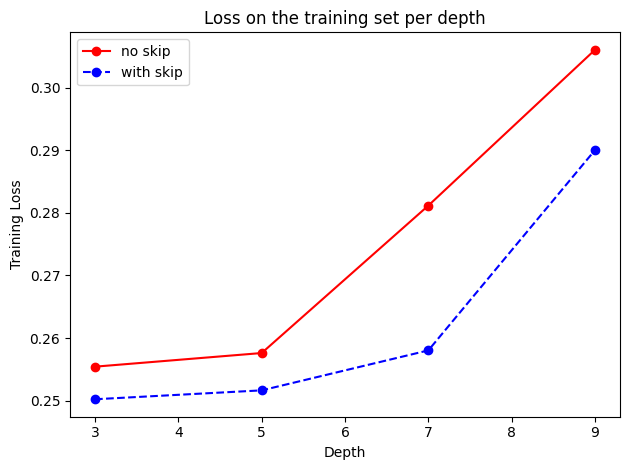

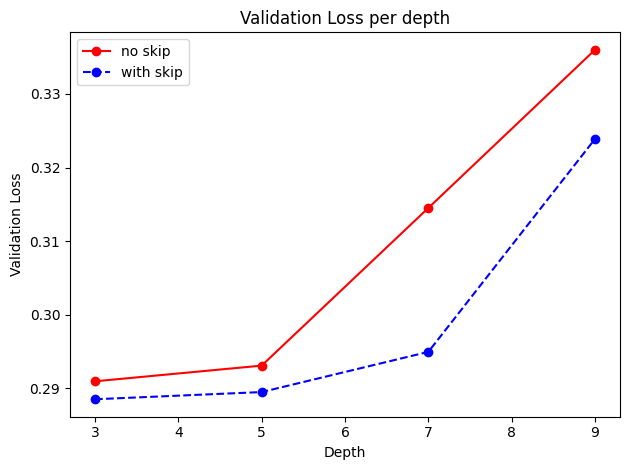

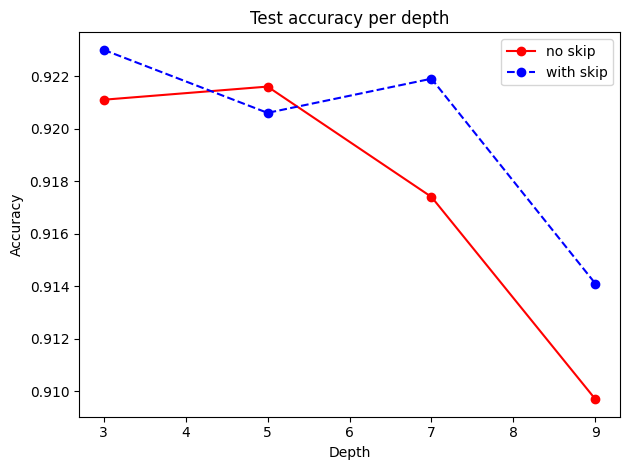

In [5]:
train_losses_no_skip = [x["training loss"] for x in no_skip_summaries]
train_losses_skip = [x["training loss"] for x in skip_summaries]
val_losses_no_skip = [x["validation loss"] for x in no_skip_summaries]
val_losses_skip = [x["validation loss"] for x in skip_summaries]

plt.figure()
plt.plot(depths, train_losses_no_skip, color='red', marker='o', linestyle='-', label='no skip')
plt.plot(depths, train_losses_skip, color='blue', marker='o', linestyle='--', label='with skip')
plt.title("Loss on the training set per depth")
plt.xlabel("Depth")
plt.ylabel("Training Loss")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(depths, val_losses_no_skip, color='red', marker='o', linestyle='-', label='no skip')
plt.plot(depths, val_losses_skip, color='blue', marker='o', linestyle='--', label='with skip')
plt.title("Validation Loss per depth")
plt.xlabel("Depth")
plt.ylabel("Validation Loss")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(depths, no_skip_test_accs, color='red', marker='o', linestyle='-', label='no skip')
plt.plot(depths, skip_test_accs, color='blue', marker='o', linestyle='--', label='with skip')
plt.title("Test accuracy per depth")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()


### Exercise 1.3: Rinse and Repeat (but with a CNN)

Repeat the verification you did above, but with **Convolutional** Neural Networks. If you were careful about abstracting your model and training code, this should be a simple exercise. Show that **deeper** CNNs *without* residual connections do not always work better and **even deeper** ones *with* residual connections.

**Hint**: You probably should do this exercise using CIFAR-10, since MNIST is *very* easy (at least up to about 99% accuracy).

**Tip**: Feel free to reuse the ResNet building blocks defined in `torchvision.models.resnet` (e.g. [BasicBlock](https://github.com/pytorch/vision/blob/main/torchvision/models/resnet.py#L59) which handles the cascade of 3x3 convolutions, skip connections, and optional downsampling). This is an excellent exercise in code diving. 

**Spoiler**: Depending on the optional exercises you plan to do below, you should think *very* carefully about the architectures of your CNNs here (so you can reuse them!).

In [24]:
# Es 1.3
# Getting CIFAR10
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                         std=[0.2023, 0.1994, 0.2010])
])
###data augmentation###
augment = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

ds_train = CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

ds_test = CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

trainer_config = {
    "device": 'cuda', 
    "num_workers": 4, 
    "seed": 10
}

layers =[
    ("Conv2d", 3, 32, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 32),
    ("Conv2d", 32, 64, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 64),
    ("MaxPool2d", 2),  # aggiunto
    ("Dropout", 0.5),
    ("Linear", 1024, 128, 2, 10)
]

layers_medium_net = [
    ("Conv2d", 3, 64, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 64),
    ("Conv2d", 64, 64, 3, 1, 1, "zeros", "ReLU"),
    ("Dropout", 0.5),
    ("BatchNorm2d", 64),
    ("MaxPool2d", 2),

    ("Conv2d", 64, 128, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 128),
    ("Conv2d", 128, 128, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 128),
    ("MaxPool2d", 2),

    ("Conv2d", 128, 256, 3, 1, 1, "zeros", "ReLU"),  # aggiunto blocco
    ("BatchNorm2d", 256),
    ("MaxPool2d", 2),  # aggiunto per ridurre a 4x4

    ("Linear", 4096, 512, 1, 256, "ReLU"),
    ("Dropout", 0.5),
    ("Linear", 256, 128, 2, 10)
]

layers_deeper_net = [
    ("Conv2d", 3, 64, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 64),
    ("Conv2d", 64, 64, 3, 1, 1, "zeros", "ReLU"),
    ("Dropout", 0.5),
    ("BatchNorm2d", 64),
    ("MaxPool2d", 2),

    ("Conv2d", 64, 128, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 128),
    ("Conv2d", 128, 128, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 128),
    ("MaxPool2d", 2),

    ("Conv2d", 128, 256, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 256),
    ("Conv2d", 256, 256, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 256),
    ("MaxPool2d", 2),

    ("Linear", 4096, 512, 1, 256, "ReLU"),
    ("Dropout", 0.5),
    ("Linear", 256, 128, 2, 10)
]



smallRes_net = MyResNet(layers, data_shape=(3,32,32))
mediumRes_net_no_skips = MyResNet(layers_medium_net, data_shape=(3,32,32))
mediumRes_net = MyResNet(layers_medium_net, data_shape=(3,32,32),skip_dict={1:4,4:7,7:9,9:12})
deeperRes_net = MyResNet(layers_deeper_net, data_shape=(3,32,32))
deeperRes_net_skips = MyResNet(layers_deeper_net, data_shape=(3,32,32),skip_dict={1:4,4:7,7:9,9:12,12:14})

ResNets = [smallRes_net, mediumRes_net_no_skips, mediumRes_net, deeperRes_net, deeperRes_net_skips]
histories = []

In [25]:
best_CNN = None
name_best = None
test_acc = 0
test_acc_list = list()

for i, model in enumerate(ResNets):
 
    project = 'ResNet number' + str(i+1)

    trainer = Trainer(config=trainer_config, model=model,optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4),dataset=ds_train, lr=0.001)
    trainer.train(data_split=[0.2, 0.8], batch_size=64, num_epochs=65, early_stopping=3, val_check=3, use_wandb=True, project_name=project, augmentation=(0.4,augment), checks=False)

   
    history_cpu = {
        k: [v_i.item() if torch.is_tensor(v_i) else v_i for v_i in v]
        for k, v in trainer.history.items()
    }
    histories.append(history_cpu)
    
    loss,acc = model.test(ds_test)
    test_acc_list.append(acc)
    
    if acc > test_acc :
            best_CNN = model
            test_acc = acc
            name_best = project
    
    

    del model
    del trainer
    gc.collect()
    torch.cuda.empty_cache()


running on device cuda


Training epoch 0: 100%|██████████| 875/875 [00:09<00:00, 95.33it/s]

Epoch 0/65, Average training loss: 1.6375


Epoch 0/65, Training accuracy: 0.5148


Validation epoch 0: 100%|██████████| 157/157 [00:00<00:00, 209.01it/s]

Epoch 0/65, Average validation loss: 1.3939


Epoch 0/65, Validation accuracy: 0.5109


Training epoch 1: 100%|██████████| 875/875 [00:08<00:00, 97.70it/s] 

Epoch 1/65, Average training loss: 1.3011


Epoch 1/65, Training accuracy: 0.5774


Training epoch 2: 100%|██████████| 875/875 [00:08<00:00, 100.37it/s]

Epoch 2/65, Average training loss: 1.1805


Epoch 2/65, Training accuracy: 0.6188


Training epoch 3: 100%|██████████| 875/875 [00:08<00:00, 99.32it/s] 

Epoch 3/65, Average training loss: 1.1207


Epoch 3/65, Training accuracy: 0.6288


Validation epoch 3: 100%|██████████| 157/157 [00:00<00:00, 227.57it/s]

Epoch 3/65, Average validation loss: 1.1153


Epoch 3/65, Validation accuracy: 0.6266


Training epoch 4: 100%|██████████| 875/875 [00:08<00:00, 101.01it/s]

Epoch 4/65, Average training loss: 1.0822


Epoch 4/65, Training accuracy: 0.6508


Training epoch 5: 100%|██████████| 875/875 [00:08<00:00, 100.59it/s]

Epoch 5/65, Average training loss: 1.0406


Epoch 5/65, Training accuracy: 0.6619


Training epoch 6: 100%|██████████| 875/875 [00:08<00:00, 98.04it/s] 

Epoch 6/65, Average training loss: 1.0143


Epoch 6/65, Training accuracy: 0.6611


Validation epoch 6: 100%|██████████| 157/157 [00:00<00:00, 229.62it/s]

Epoch 6/65, Average validation loss: 1.0482


Epoch 6/65, Validation accuracy: 0.6664


Training epoch 7: 100%|██████████| 875/875 [00:08<00:00, 99.88it/s] 

Epoch 7/65, Average training loss: 0.9947


Epoch 7/65, Training accuracy: 0.6849


Training epoch 8: 100%|██████████| 875/875 [00:08<00:00, 99.14it/s] 

Epoch 8/65, Average training loss: 0.9717


Epoch 8/65, Training accuracy: 0.6803


Training epoch 9: 100%|██████████| 875/875 [00:08<00:00, 98.30it/s] 

Epoch 9/65, Average training loss: 0.9554


Epoch 9/65, Training accuracy: 0.6946


Validation epoch 9: 100%|██████████| 157/157 [00:00<00:00, 177.64it/s]

Epoch 9/65, Average validation loss: 0.9686


Epoch 9/65, Validation accuracy: 0.6798


Training epoch 10: 100%|██████████| 875/875 [00:09<00:00, 97.07it/s] 

Epoch 10/65, Average training loss: 0.9385


Epoch 10/65, Training accuracy: 0.7058


Training epoch 11: 100%|██████████| 875/875 [00:09<00:00, 94.70it/s] 

Epoch 11/65, Average training loss: 0.9281


Epoch 11/65, Training accuracy: 0.6985


Training epoch 12: 100%|██████████| 875/875 [00:09<00:00, 95.14it/s] 

Epoch 12/65, Average training loss: 0.9139


Epoch 12/65, Training accuracy: 0.7035


Validation epoch 12: 100%|██████████| 157/157 [00:00<00:00, 198.39it/s]

Epoch 12/65, Average validation loss: 0.9572


Epoch 12/65, Validation accuracy: 0.6923


Training epoch 13: 100%|██████████| 875/875 [00:09<00:00, 96.62it/s] 

Epoch 13/65, Average training loss: 0.9077


Epoch 13/65, Training accuracy: 0.7060


Training epoch 14: 100%|██████████| 875/875 [00:09<00:00, 96.82it/s] 

Epoch 14/65, Average training loss: 0.8993


Epoch 14/65, Training accuracy: 0.7158


Training epoch 15: 100%|██████████| 875/875 [00:08<00:00, 97.52it/s] 

Epoch 15/65, Average training loss: 0.8913


Epoch 15/65, Training accuracy: 0.7202


Validation epoch 15: 100%|██████████| 157/157 [00:00<00:00, 208.55it/s]

Epoch 15/65, Average validation loss: 0.9388


Epoch 15/65, Validation accuracy: 0.7100


Training epoch 16: 100%|██████████| 875/875 [00:09<00:00, 95.43it/s]

Epoch 16/65, Average training loss: 0.8834


Epoch 16/65, Training accuracy: 0.7328


Training epoch 17: 100%|██████████| 875/875 [00:09<00:00, 92.57it/s]

Epoch 17/65, Average training loss: 0.8732


Epoch 17/65, Training accuracy: 0.7282


Training epoch 18: 100%|██████████| 875/875 [00:09<00:00, 89.62it/s]

Epoch 18/65, Average training loss: 0.8686


Epoch 18/65, Training accuracy: 0.7336


Validation epoch 18: 100%|██████████| 157/157 [00:00<00:00, 177.67it/s]

Epoch 18/65, Average validation loss: 0.9022


Epoch 18/65, Validation accuracy: 0.7173


Training epoch 19: 100%|██████████| 875/875 [00:09<00:00, 92.44it/s]

Epoch 19/65, Average training loss: 0.8640


Epoch 19/65, Training accuracy: 0.7235


Training epoch 20: 100%|██████████| 875/875 [00:09<00:00, 91.43it/s]

Epoch 20/65, Average training loss: 0.8598


Epoch 20/65, Training accuracy: 0.7332


Training epoch 21: 100%|██████████| 875/875 [00:09<00:00, 91.77it/s]

Epoch 21/65, Average training loss: 0.8487


Epoch 21/65, Training accuracy: 0.7346


Validation epoch 21: 100%|██████████| 157/157 [00:00<00:00, 180.85it/s]

Epoch 21/65, Average validation loss: 0.9013


Epoch 21/65, Validation accuracy: 0.7192


Training epoch 22: 100%|██████████| 875/875 [00:09<00:00, 93.33it/s]

Epoch 22/65, Average training loss: 0.8505


Epoch 22/65, Training accuracy: 0.7328


Training epoch 23: 100%|██████████| 875/875 [00:09<00:00, 91.50it/s]

Epoch 23/65, Average training loss: 0.8446


Epoch 23/65, Training accuracy: 0.7405


Training epoch 24: 100%|██████████| 875/875 [00:09<00:00, 97.15it/s] 

Epoch 24/65, Average training loss: 0.8400


Epoch 24/65, Training accuracy: 0.7336


Validation epoch 24: 100%|██████████| 157/157 [00:00<00:00, 184.78it/s]

Epoch 24/65, Average validation loss: 0.9073


Epoch 24/65, Validation accuracy: 0.7163


Training epoch 25: 100%|██████████| 875/875 [00:08<00:00, 97.37it/s] 

Epoch 25/65, Average training loss: 0.8317


Epoch 25/65, Training accuracy: 0.7407


Training epoch 26: 100%|██████████| 875/875 [00:09<00:00, 97.13it/s] 

Epoch 26/65, Average training loss: 0.8273


Epoch 26/65, Training accuracy: 0.7397


Training epoch 27: 100%|██████████| 875/875 [00:08<00:00, 98.11it/s] 

Epoch 27/65, Average training loss: 0.8255


Epoch 27/65, Training accuracy: 0.7450


Validation epoch 27: 100%|██████████| 157/157 [00:00<00:00, 206.79it/s]

Epoch 27/65, Average validation loss: 0.8756


Epoch 27/65, Validation accuracy: 0.7236


Training epoch 28: 100%|██████████| 875/875 [00:08<00:00, 97.83it/s] 

Epoch 28/65, Average training loss: 0.8194


Epoch 28/65, Training accuracy: 0.7480


Training epoch 29: 100%|██████████| 875/875 [00:08<00:00, 98.61it/s] 

Epoch 29/65, Average training loss: 0.8218


Epoch 29/65, Training accuracy: 0.7498


Training epoch 30: 100%|██████████| 875/875 [00:09<00:00, 96.45it/s] 

Epoch 30/65, Average training loss: 0.8196


Epoch 30/65, Training accuracy: 0.7476


Validation epoch 30: 100%|██████████| 157/157 [00:00<00:00, 229.75it/s]

Epoch 30/65, Average validation loss: 0.8820


Epoch 30/65, Validation accuracy: 0.7223


Training epoch 31: 100%|██████████| 875/875 [00:08<00:00, 97.99it/s] 

Epoch 31/65, Average training loss: 0.8104


Epoch 31/65, Training accuracy: 0.7501


Training epoch 32: 100%|██████████| 875/875 [00:08<00:00, 97.27it/s] 

Epoch 32/65, Average training loss: 0.8124


Epoch 32/65, Training accuracy: 0.7540


Training epoch 33: 100%|██████████| 875/875 [00:08<00:00, 97.27it/s] 

Epoch 33/65, Average training loss: 0.8042


Epoch 33/65, Training accuracy: 0.7525


Validation epoch 33: 100%|██████████| 157/157 [00:00<00:00, 210.18it/s]

Epoch 33/65, Average validation loss: 0.8457


Epoch 33/65, Validation accuracy: 0.7332


Training epoch 34: 100%|██████████| 875/875 [00:09<00:00, 94.63it/s]

Epoch 34/65, Average training loss: 0.8045


Epoch 34/65, Training accuracy: 0.7540


Training epoch 35: 100%|██████████| 875/875 [00:09<00:00, 94.36it/s]

Epoch 35/65, Average training loss: 0.8036


Epoch 35/65, Training accuracy: 0.7545


Training epoch 36: 100%|██████████| 875/875 [00:09<00:00, 90.90it/s]

Epoch 36/65, Average training loss: 0.7983


Epoch 36/65, Training accuracy: 0.7594


Validation epoch 36: 100%|██████████| 157/157 [00:00<00:00, 175.53it/s]

Epoch 36/65, Average validation loss: 0.8490


Epoch 36/65, Validation accuracy: 0.7372


Training epoch 37: 100%|██████████| 875/875 [00:09<00:00, 95.82it/s] 

Epoch 37/65, Average training loss: 0.7945


Epoch 37/65, Training accuracy: 0.7615


Training epoch 38: 100%|██████████| 875/875 [00:09<00:00, 96.89it/s]

Epoch 38/65, Average training loss: 0.7958


Epoch 38/65, Training accuracy: 0.7585


Training epoch 39: 100%|██████████| 875/875 [00:09<00:00, 97.15it/s] 

Epoch 39/65, Average training loss: 0.7916


Epoch 39/65, Training accuracy: 0.7565


Validation epoch 39: 100%|██████████| 157/157 [00:00<00:00, 198.07it/s]

Epoch 39/65, Average validation loss: 0.8375


Epoch 39/65, Validation accuracy: 0.7340


Training epoch 40: 100%|██████████| 875/875 [00:08<00:00, 97.33it/s] 

Epoch 40/65, Average training loss: 0.7930


Epoch 40/65, Training accuracy: 0.7653


Training epoch 41: 100%|██████████| 875/875 [00:09<00:00, 96.49it/s]

Epoch 41/65, Average training loss: 0.7848


Epoch 41/65, Training accuracy: 0.7664


Training epoch 42: 100%|██████████| 875/875 [00:09<00:00, 96.72it/s] 

Epoch 42/65, Average training loss: 0.7860


Epoch 42/65, Training accuracy: 0.7456


Validation epoch 42: 100%|██████████| 157/157 [00:00<00:00, 179.77it/s]

Epoch 42/65, Average validation loss: 0.8459


Epoch 42/65, Validation accuracy: 0.7397


Training epoch 43: 100%|██████████| 875/875 [00:09<00:00, 96.55it/s]

Epoch 43/65, Average training loss: 0.7806


Epoch 43/65, Training accuracy: 0.7689


Training epoch 44: 100%|██████████| 875/875 [00:08<00:00, 97.23it/s] 

Epoch 44/65, Average training loss: 0.7773


Epoch 44/65, Training accuracy: 0.7642


Training epoch 45: 100%|██████████| 875/875 [00:08<00:00, 97.63it/s] 

Epoch 45/65, Average training loss: 0.7869


Epoch 45/65, Training accuracy: 0.7602


Validation epoch 45: 100%|██████████| 157/157 [00:00<00:00, 223.24it/s]

Epoch 45/65, Average validation loss: 0.8333


Epoch 45/65, Validation accuracy: 0.7401


Training epoch 46: 100%|██████████| 875/875 [00:08<00:00, 97.57it/s] 

Epoch 46/65, Average training loss: 0.7775


Epoch 46/65, Training accuracy: 0.7681


Training epoch 47: 100%|██████████| 875/875 [00:08<00:00, 97.45it/s] 

Epoch 47/65, Average training loss: 0.7752


Epoch 47/65, Training accuracy: 0.7666


Training epoch 48: 100%|██████████| 875/875 [00:08<00:00, 97.29it/s] 

Epoch 48/65, Average training loss: 0.7770


Epoch 48/65, Training accuracy: 0.7652


Validation epoch 48: 100%|██████████| 157/157 [00:00<00:00, 223.31it/s]

Epoch 48/65, Average validation loss: 0.8320


Epoch 48/65, Validation accuracy: 0.7457


Training epoch 49: 100%|██████████| 875/875 [00:08<00:00, 97.91it/s] 

Epoch 49/65, Average training loss: 0.7679


Epoch 49/65, Training accuracy: 0.7600


Training epoch 50: 100%|██████████| 875/875 [00:08<00:00, 97.79it/s] 


Epoch 50/65, Average training loss: 0.7687
Epoch 50/65, Training accuracy: 0.7702


Training epoch 51: 100%|██████████| 875/875 [00:08<00:00, 97.28it/s] 

Epoch 51/65, Average training loss: 0.7712


Epoch 51/65, Training accuracy: 0.7729


Validation epoch 51: 100%|██████████| 157/157 [00:00<00:00, 203.77it/s]

Epoch 51/65, Average validation loss: 0.8263


Epoch 51/65, Validation accuracy: 0.7500


Training epoch 52: 100%|██████████| 875/875 [00:08<00:00, 98.19it/s] 

Epoch 52/65, Average training loss: 0.7622


Epoch 52/65, Training accuracy: 0.7740


Training epoch 53: 100%|██████████| 875/875 [00:08<00:00, 97.81it/s] 

Epoch 53/65, Average training loss: 0.7652


Epoch 53/65, Training accuracy: 0.7679


Training epoch 54: 100%|██████████| 875/875 [00:08<00:00, 97.80it/s] 

Epoch 54/65, Average training loss: 0.7637


Epoch 54/65, Training accuracy: 0.7730


Validation epoch 54: 100%|██████████| 157/157 [00:00<00:00, 181.03it/s]

Epoch 54/65, Average validation loss: 0.8156


Epoch 54/65, Validation accuracy: 0.7466


Training epoch 55: 100%|██████████| 875/875 [00:09<00:00, 88.41it/s]

Epoch 55/65, Average training loss: 0.7631


Epoch 55/65, Training accuracy: 0.7721


Training epoch 56: 100%|██████████| 875/875 [00:09<00:00, 91.70it/s]

Epoch 56/65, Average training loss: 0.7560


Epoch 56/65, Training accuracy: 0.7729


Training epoch 57: 100%|██████████| 875/875 [00:09<00:00, 91.12it/s]

Epoch 57/65, Average training loss: 0.7611


Epoch 57/65, Training accuracy: 0.7639


Validation epoch 57: 100%|██████████| 157/157 [00:00<00:00, 184.25it/s]

Epoch 57/65, Average validation loss: 0.8327


Epoch 57/65, Validation accuracy: 0.7410
Early stopping triggered!


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇█
loss,█▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
training set accuracy,▁▃▄▅▅▆▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇██████████████
val_loss,███▅▅▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation set accuracy,▁▁▁▄▄▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇█████████████████
epoch,56
loss,0.75596
training set accuracy,0.77295
val_loss,0.81556
validation set accuracy,0.7466


Test set loss: 0.6736, accuracy: 0.7695
running on device cuda


Training epoch 0: 100%|██████████| 875/875 [00:11<00:00, 76.23it/s]

Epoch 0/65, Average training loss: 1.4274


Epoch 0/65, Training accuracy: 0.5589


Validation epoch 0: 100%|██████████| 157/157 [00:00<00:00, 164.80it/s]

Epoch 0/65, Average validation loss: 1.0946


Epoch 0/65, Validation accuracy: 0.5566


Training epoch 1: 100%|██████████| 875/875 [00:10<00:00, 79.79it/s]

Epoch 1/65, Average training loss: 0.9517


Epoch 1/65, Training accuracy: 0.6847


Training epoch 2: 100%|██████████| 875/875 [00:10<00:00, 81.05it/s]

Epoch 2/65, Average training loss: 0.7678


Epoch 2/65, Training accuracy: 0.7438


Training epoch 3: 100%|██████████| 875/875 [00:10<00:00, 84.06it/s]

Epoch 3/65, Average training loss: 0.6594


Epoch 3/65, Training accuracy: 0.7789


Validation epoch 3: 100%|██████████| 157/157 [00:00<00:00, 185.96it/s]

Epoch 3/65, Average validation loss: 0.6752


Epoch 3/65, Validation accuracy: 0.7472


Training epoch 4: 100%|██████████| 875/875 [00:10<00:00, 84.13it/s]

Epoch 4/65, Average training loss: 0.5947


Epoch 4/65, Training accuracy: 0.8041


Training epoch 5: 100%|██████████| 875/875 [00:10<00:00, 84.25it/s]

Epoch 5/65, Average training loss: 0.5383


Epoch 5/65, Training accuracy: 0.8033


Training epoch 6: 100%|██████████| 875/875 [00:10<00:00, 83.91it/s]

Epoch 6/65, Average training loss: 0.5062


Epoch 6/65, Training accuracy: 0.8372


Validation epoch 6: 100%|██████████| 157/157 [00:00<00:00, 181.01it/s]

Epoch 6/65, Average validation loss: 0.6015


Epoch 6/65, Validation accuracy: 0.7975


Training epoch 7: 100%|██████████| 875/875 [00:10<00:00, 84.02it/s]

Epoch 7/65, Average training loss: 0.4744


Epoch 7/65, Training accuracy: 0.8084


Training epoch 8: 100%|██████████| 875/875 [00:10<00:00, 84.01it/s]

Epoch 8/65, Average training loss: 0.4431


Epoch 8/65, Training accuracy: 0.8490


Training epoch 9: 100%|██████████| 875/875 [00:10<00:00, 82.49it/s]

Epoch 9/65, Average training loss: 0.4249


Epoch 9/65, Training accuracy: 0.8552


Validation epoch 9: 100%|██████████| 157/157 [00:00<00:00, 188.69it/s]

Epoch 9/65, Average validation loss: 0.5201


Epoch 9/65, Validation accuracy: 0.8201


Training epoch 10: 100%|██████████| 875/875 [00:10<00:00, 84.05it/s]

Epoch 10/65, Average training loss: 0.4004


Epoch 10/65, Training accuracy: 0.8695


Training epoch 11: 100%|██████████| 875/875 [00:10<00:00, 84.08it/s]

Epoch 11/65, Average training loss: 0.3844


Epoch 11/65, Training accuracy: 0.8511


Training epoch 12: 100%|██████████| 875/875 [00:11<00:00, 77.84it/s]

Epoch 12/65, Average training loss: 0.3742


Epoch 12/65, Training accuracy: 0.8506


Validation epoch 12: 100%|██████████| 157/157 [00:00<00:00, 175.43it/s]

Epoch 12/65, Average validation loss: 0.5371


Epoch 12/65, Validation accuracy: 0.8137


Training epoch 13: 100%|██████████| 875/875 [00:10<00:00, 80.88it/s]

Epoch 13/65, Average training loss: 0.3615


Epoch 13/65, Training accuracy: 0.8703


Training epoch 14: 100%|██████████| 875/875 [00:10<00:00, 80.47it/s]

Epoch 14/65, Average training loss: 0.3491


Epoch 14/65, Training accuracy: 0.8802


Training epoch 15: 100%|██████████| 875/875 [00:10<00:00, 80.32it/s]

Epoch 15/65, Average training loss: 0.3418


Epoch 15/65, Training accuracy: 0.8634


Validation epoch 15: 100%|██████████| 157/157 [00:00<00:00, 165.77it/s]

Epoch 15/65, Average validation loss: 0.4903


Epoch 15/65, Validation accuracy: 0.8192


Training epoch 16: 100%|██████████| 875/875 [00:10<00:00, 80.25it/s]

Epoch 16/65, Average training loss: 0.3265


Epoch 16/65, Training accuracy: 0.8682


Training epoch 17: 100%|██████████| 875/875 [00:10<00:00, 80.47it/s]

Epoch 17/65, Average training loss: 0.3220


Epoch 17/65, Training accuracy: 0.8715


Training epoch 18: 100%|██████████| 875/875 [00:10<00:00, 80.03it/s]

Epoch 18/65, Average training loss: 0.3126


Epoch 18/65, Training accuracy: 0.8929


Validation epoch 18: 100%|██████████| 157/157 [00:00<00:00, 171.63it/s]

Epoch 18/65, Average validation loss: 0.4642


Epoch 18/65, Validation accuracy: 0.8408


Training epoch 19: 100%|██████████| 875/875 [00:10<00:00, 80.16it/s]

Epoch 19/65, Average training loss: 0.3011


Epoch 19/65, Training accuracy: 0.8850


Training epoch 20: 100%|██████████| 875/875 [00:10<00:00, 80.02it/s]

Epoch 20/65, Average training loss: 0.2995


Epoch 20/65, Training accuracy: 0.8923


Training epoch 21: 100%|██████████| 875/875 [00:10<00:00, 80.36it/s]

Epoch 21/65, Average training loss: 0.2960


Epoch 21/65, Training accuracy: 0.8933


Validation epoch 21: 100%|██████████| 157/157 [00:00<00:00, 166.55it/s]

Epoch 21/65, Average validation loss: 0.4618


Epoch 21/65, Validation accuracy: 0.8398


Training epoch 22: 100%|██████████| 875/875 [00:10<00:00, 80.42it/s]

Epoch 22/65, Average training loss: 0.2864


Epoch 22/65, Training accuracy: 0.8647


Training epoch 23: 100%|██████████| 875/875 [00:10<00:00, 79.66it/s]

Epoch 23/65, Average training loss: 0.2820


Epoch 23/65, Training accuracy: 0.8911


Training epoch 24: 100%|██████████| 875/875 [00:10<00:00, 79.64it/s]

Epoch 24/65, Average training loss: 0.2780


Epoch 24/65, Training accuracy: 0.8945


Validation epoch 24: 100%|██████████| 157/157 [00:00<00:00, 165.84it/s]

Epoch 24/65, Average validation loss: 0.4681


Epoch 24/65, Validation accuracy: 0.8358


Training epoch 25: 100%|██████████| 875/875 [00:10<00:00, 80.13it/s]

Epoch 25/65, Average training loss: 0.2711


Epoch 25/65, Training accuracy: 0.8981


Training epoch 26: 100%|██████████| 875/875 [00:10<00:00, 79.83it/s]

Epoch 26/65, Average training loss: 0.2731


Epoch 26/65, Training accuracy: 0.9067


Training epoch 27: 100%|██████████| 875/875 [00:10<00:00, 80.01it/s]

Epoch 27/65, Average training loss: 0.2639


Epoch 27/65, Training accuracy: 0.8856


Validation epoch 27: 100%|██████████| 157/157 [00:01<00:00, 154.27it/s]

Epoch 27/65, Average validation loss: 0.4598


Epoch 27/65, Validation accuracy: 0.8387


Training epoch 28: 100%|██████████| 875/875 [00:11<00:00, 77.70it/s]

Epoch 28/65, Average training loss: 0.2583


Epoch 28/65, Training accuracy: 0.9032


Training epoch 29: 100%|██████████| 875/875 [00:11<00:00, 79.51it/s]

Epoch 29/65, Average training loss: 0.2606


Epoch 29/65, Training accuracy: 0.8900


Training epoch 30: 100%|██████████| 875/875 [00:10<00:00, 79.73it/s]

Epoch 30/65, Average training loss: 0.2527


Epoch 30/65, Training accuracy: 0.9079


Validation epoch 30: 100%|██████████| 157/157 [00:00<00:00, 159.89it/s]

Epoch 30/65, Average validation loss: 0.4660


Epoch 30/65, Validation accuracy: 0.8473


Training epoch 31: 100%|██████████| 875/875 [00:10<00:00, 79.69it/s]

Epoch 31/65, Average training loss: 0.2568


Epoch 31/65, Training accuracy: 0.8943


Training epoch 32: 100%|██████████| 875/875 [00:11<00:00, 79.32it/s]

Epoch 32/65, Average training loss: 0.2502


Epoch 32/65, Training accuracy: 0.8932


Training epoch 33: 100%|██████████| 875/875 [00:10<00:00, 80.07it/s]

Epoch 33/65, Average training loss: 0.2514


Epoch 33/65, Training accuracy: 0.8771


Validation epoch 33: 100%|██████████| 157/157 [00:00<00:00, 167.11it/s]

Epoch 33/65, Average validation loss: 0.4715


Epoch 33/65, Validation accuracy: 0.8251
Early stopping triggered!


epoch,▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇███
loss,█▅▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
training set accuracy,▁▄▅▅▆▆▇▆▇▇▇▇▇▇▇▇▇▇████▇██████████
val_loss,███▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation set accuracy,▁▁▁▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇███████████████
epoch,32
loss,0.25022
training set accuracy,0.89316
val_loss,0.46601
validation set accuracy,0.8473


Test set loss: 0.5593, accuracy: 0.8407
running on device cuda


Training epoch 0: 100%|██████████| 875/875 [00:11<00:00, 77.26it/s]

Epoch 0/65, Average training loss: 1.3909


Epoch 0/65, Training accuracy: 0.6140


Validation epoch 0: 100%|██████████| 157/157 [00:00<00:00, 163.01it/s]

Epoch 0/65, Average validation loss: 1.0696


Epoch 0/65, Validation accuracy: 0.5664


Training epoch 1: 100%|██████████| 875/875 [00:11<00:00, 77.30it/s]

Epoch 1/65, Average training loss: 0.9182


Epoch 1/65, Training accuracy: 0.7111


Training epoch 2: 100%|██████████| 875/875 [00:11<00:00, 77.59it/s]

Epoch 2/65, Average training loss: 0.7471


Epoch 2/65, Training accuracy: 0.7271


Training epoch 3: 100%|██████████| 875/875 [00:11<00:00, 77.22it/s]

Epoch 3/65, Average training loss: 0.6541


Epoch 3/65, Training accuracy: 0.7792


Validation epoch 3: 100%|██████████| 157/157 [00:00<00:00, 167.67it/s]

Epoch 3/65, Average validation loss: 0.6710


Epoch 3/65, Validation accuracy: 0.7578


Training epoch 4: 100%|██████████| 875/875 [00:11<00:00, 77.89it/s]

Epoch 4/65, Average training loss: 0.5909


Epoch 4/65, Training accuracy: 0.7777


Training epoch 5: 100%|██████████| 875/875 [00:11<00:00, 77.57it/s]

Epoch 5/65, Average training loss: 0.5381


Epoch 5/65, Training accuracy: 0.7685


Training epoch 6: 100%|██████████| 875/875 [00:11<00:00, 77.45it/s]

Epoch 6/65, Average training loss: 0.5022


Epoch 6/65, Training accuracy: 0.8003


Validation epoch 6: 100%|██████████| 157/157 [00:00<00:00, 162.87it/s]

Epoch 6/65, Average validation loss: 0.5813


Epoch 6/65, Validation accuracy: 0.7766


Training epoch 7: 100%|██████████| 875/875 [00:11<00:00, 77.71it/s]

Epoch 7/65, Average training loss: 0.4708


Epoch 7/65, Training accuracy: 0.8151


Training epoch 8: 100%|██████████| 875/875 [00:11<00:00, 76.85it/s]

Epoch 8/65, Average training loss: 0.4413


Epoch 8/65, Training accuracy: 0.8253


Training epoch 9: 100%|██████████| 875/875 [00:11<00:00, 77.09it/s]

Epoch 9/65, Average training loss: 0.4232


Epoch 9/65, Training accuracy: 0.8350


Validation epoch 9: 100%|██████████| 157/157 [00:00<00:00, 163.54it/s]

Epoch 9/65, Average validation loss: 0.5186


Epoch 9/65, Validation accuracy: 0.8022


Training epoch 10: 100%|██████████| 875/875 [00:11<00:00, 77.84it/s]

Epoch 10/65, Average training loss: 0.4044


Epoch 10/65, Training accuracy: 0.8510


Training epoch 11: 100%|██████████| 875/875 [00:11<00:00, 77.48it/s]

Epoch 11/65, Average training loss: 0.3903


Epoch 11/65, Training accuracy: 0.8387


Training epoch 12: 100%|██████████| 875/875 [00:11<00:00, 77.52it/s]

Epoch 12/65, Average training loss: 0.3801


Epoch 12/65, Training accuracy: 0.8376


Validation epoch 12: 100%|██████████| 157/157 [00:00<00:00, 165.53it/s]

Epoch 12/65, Average validation loss: 0.5285


Epoch 12/65, Validation accuracy: 0.8049


Training epoch 13: 100%|██████████| 875/875 [00:11<00:00, 77.42it/s]

Epoch 13/65, Average training loss: 0.3594


Epoch 13/65, Training accuracy: 0.8385


Training epoch 14: 100%|██████████| 875/875 [00:11<00:00, 77.35it/s]

Epoch 14/65, Average training loss: 0.3514


Epoch 14/65, Training accuracy: 0.8503


Training epoch 15: 100%|██████████| 875/875 [00:11<00:00, 77.54it/s]

Epoch 15/65, Average training loss: 0.3454


Epoch 15/65, Training accuracy: 0.8606


Validation epoch 15: 100%|██████████| 157/157 [00:00<00:00, 169.19it/s]

Epoch 15/65, Average validation loss: 0.4967


Epoch 15/65, Validation accuracy: 0.8200


Training epoch 16: 100%|██████████| 875/875 [00:11<00:00, 77.31it/s]

Epoch 16/65, Average training loss: 0.3293


Epoch 16/65, Training accuracy: 0.8558


Training epoch 17: 100%|██████████| 875/875 [00:11<00:00, 77.56it/s]

Epoch 17/65, Average training loss: 0.3264


Epoch 17/65, Training accuracy: 0.8770


Training epoch 18: 100%|██████████| 875/875 [00:11<00:00, 77.40it/s]

Epoch 18/65, Average training loss: 0.3177


Epoch 18/65, Training accuracy: 0.8641


Validation epoch 18: 100%|██████████| 157/157 [00:00<00:00, 166.43it/s]

Epoch 18/65, Average validation loss: 0.4821


Epoch 18/65, Validation accuracy: 0.8125


Training epoch 19: 100%|██████████| 875/875 [00:11<00:00, 77.86it/s]

Epoch 19/65, Average training loss: 0.3084


Epoch 19/65, Training accuracy: 0.8795


Training epoch 20: 100%|██████████| 875/875 [00:11<00:00, 77.64it/s]

Epoch 20/65, Average training loss: 0.3056


Epoch 20/65, Training accuracy: 0.8688


Training epoch 21: 100%|██████████| 875/875 [00:11<00:00, 77.66it/s]

Epoch 21/65, Average training loss: 0.2985


Epoch 21/65, Training accuracy: 0.8731


Validation epoch 21: 100%|██████████| 157/157 [00:00<00:00, 160.20it/s]

Epoch 21/65, Average validation loss: 0.4804


Epoch 21/65, Validation accuracy: 0.8073


Training epoch 22: 100%|██████████| 875/875 [00:11<00:00, 77.76it/s]

Epoch 22/65, Average training loss: 0.2907


Epoch 22/65, Training accuracy: 0.8791


Training epoch 23: 100%|██████████| 875/875 [00:11<00:00, 77.79it/s]

Epoch 23/65, Average training loss: 0.2843


Epoch 23/65, Training accuracy: 0.8971


Training epoch 24: 100%|██████████| 875/875 [00:11<00:00, 77.58it/s]

Epoch 24/65, Average training loss: 0.2811


Epoch 24/65, Training accuracy: 0.8939


Validation epoch 24: 100%|██████████| 157/157 [00:00<00:00, 161.98it/s]

Epoch 24/65, Average validation loss: 0.4748


Epoch 24/65, Validation accuracy: 0.8331


Training epoch 25: 100%|██████████| 875/875 [00:11<00:00, 77.74it/s]

Epoch 25/65, Average training loss: 0.2779


Epoch 25/65, Training accuracy: 0.8860


Training epoch 26: 100%|██████████| 875/875 [00:11<00:00, 77.75it/s]

Epoch 26/65, Average training loss: 0.2761


Epoch 26/65, Training accuracy: 0.8899


Training epoch 27: 100%|██████████| 875/875 [00:11<00:00, 77.53it/s]

Epoch 27/65, Average training loss: 0.2689


Epoch 27/65, Training accuracy: 0.8648


Validation epoch 27: 100%|██████████| 157/157 [00:00<00:00, 164.65it/s]

Epoch 27/65, Average validation loss: 0.4590


Epoch 27/65, Validation accuracy: 0.8114


Training epoch 28: 100%|██████████| 875/875 [00:11<00:00, 77.62it/s]

Epoch 28/65, Average training loss: 0.2716


Epoch 28/65, Training accuracy: 0.8962


Training epoch 29: 100%|██████████| 875/875 [00:11<00:00, 77.49it/s]

Epoch 29/65, Average training loss: 0.2660


Epoch 29/65, Training accuracy: 0.8817


Training epoch 30: 100%|██████████| 875/875 [00:11<00:00, 77.15it/s]

Epoch 30/65, Average training loss: 0.2622


Epoch 30/65, Training accuracy: 0.8791


Validation epoch 30: 100%|██████████| 157/157 [00:00<00:00, 164.40it/s]

Epoch 30/65, Average validation loss: 0.4618


Epoch 30/65, Validation accuracy: 0.8305


Training epoch 31: 100%|██████████| 875/875 [00:11<00:00, 77.74it/s]

Epoch 31/65, Average training loss: 0.2618


Epoch 31/65, Training accuracy: 0.8974


Training epoch 32: 100%|██████████| 875/875 [00:11<00:00, 77.61it/s]

Epoch 32/65, Average training loss: 0.2553


Epoch 32/65, Training accuracy: 0.8932


Training epoch 33: 100%|██████████| 875/875 [00:11<00:00, 77.37it/s]

Epoch 33/65, Average training loss: 0.2566


Epoch 33/65, Training accuracy: 0.8729


Validation epoch 33: 100%|██████████| 157/157 [00:00<00:00, 168.92it/s]

Epoch 33/65, Average validation loss: 0.4746


Epoch 33/65, Validation accuracy: 0.8130


Training epoch 34: 100%|██████████| 875/875 [00:11<00:00, 77.38it/s]

Epoch 34/65, Average training loss: 0.2477


Epoch 34/65, Training accuracy: 0.8863


Training epoch 35: 100%|██████████| 875/875 [00:11<00:00, 77.54it/s]

Epoch 35/65, Average training loss: 0.2496


Epoch 35/65, Training accuracy: 0.8979


Training epoch 36: 100%|██████████| 875/875 [00:11<00:00, 77.49it/s]

Epoch 36/65, Average training loss: 0.2481


Epoch 36/65, Training accuracy: 0.8989


Validation epoch 36: 100%|██████████| 157/157 [00:00<00:00, 164.44it/s]

Epoch 36/65, Average validation loss: 0.4621


Epoch 36/65, Validation accuracy: 0.8367


Training epoch 37: 100%|██████████| 875/875 [00:11<00:00, 77.47it/s]

Epoch 37/65, Average training loss: 0.2399


Epoch 37/65, Training accuracy: 0.8634


Training epoch 38: 100%|██████████| 875/875 [00:11<00:00, 77.66it/s]

Epoch 38/65, Average training loss: 0.2413


Epoch 38/65, Training accuracy: 0.9011


Training epoch 39: 100%|██████████| 875/875 [00:11<00:00, 75.47it/s]

Epoch 39/65, Average training loss: 0.2443


Epoch 39/65, Training accuracy: 0.8745


Validation epoch 39: 100%|██████████| 157/157 [00:01<00:00, 147.58it/s]

Epoch 39/65, Average validation loss: 0.4529


Epoch 39/65, Validation accuracy: 0.8259


Training epoch 40: 100%|██████████| 875/875 [00:11<00:00, 74.42it/s]

Epoch 40/65, Average training loss: 0.2375


Epoch 40/65, Training accuracy: 0.8915


Training epoch 41: 100%|██████████| 875/875 [00:11<00:00, 77.50it/s]

Epoch 41/65, Average training loss: 0.2331


Epoch 41/65, Training accuracy: 0.8900


Training epoch 42: 100%|██████████| 875/875 [00:11<00:00, 77.33it/s]

Epoch 42/65, Average training loss: 0.2301


Epoch 42/65, Training accuracy: 0.9073


Validation epoch 42: 100%|██████████| 157/157 [00:00<00:00, 163.61it/s]

Epoch 42/65, Average validation loss: 0.4666


Epoch 42/65, Validation accuracy: 0.8431


Training epoch 43: 100%|██████████| 875/875 [00:11<00:00, 77.67it/s]

Epoch 43/65, Average training loss: 0.2337


Epoch 43/65, Training accuracy: 0.8984


Training epoch 44: 100%|██████████| 875/875 [00:11<00:00, 77.48it/s]

Epoch 44/65, Average training loss: 0.2339


Epoch 44/65, Training accuracy: 0.8934


Training epoch 45: 100%|██████████| 875/875 [00:11<00:00, 77.40it/s]

Epoch 45/65, Average training loss: 0.2319


Epoch 45/65, Training accuracy: 0.8893


Validation epoch 45: 100%|██████████| 157/157 [00:00<00:00, 164.67it/s]

Epoch 45/65, Average validation loss: 0.4760


Epoch 45/65, Validation accuracy: 0.8252
Early stopping triggered!


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,█▅▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
training set accuracy,▁▃▄▅▅▅▅▆▆▇▆▆▆▇▇▇▇▇▇▇▇██▇▇█▇▇██▇▇█▇█▇████
val_loss,███▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation set accuracy,▁▁▁▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇██▇▇▇███▇▇████████
epoch,44
loss,0.23393
training set accuracy,0.89343
val_loss,0.46663
validation set accuracy,0.8431


Test set loss: 0.5476, accuracy: 0.8468
running on device cuda


Training epoch 0: 100%|██████████| 875/875 [00:12<00:00, 69.14it/s]

Epoch 0/65, Average training loss: 1.4927


Epoch 0/65, Training accuracy: 0.5731


Validation epoch 0: 100%|██████████| 157/157 [00:01<00:00, 156.80it/s]

Epoch 0/65, Average validation loss: 1.1698


Epoch 0/65, Validation accuracy: 0.5351


Training epoch 1: 100%|██████████| 875/875 [00:12<00:00, 69.48it/s]

Epoch 1/65, Average training loss: 1.0366


Epoch 1/65, Training accuracy: 0.6674


Training epoch 2: 100%|██████████| 875/875 [00:12<00:00, 69.29it/s]

Epoch 2/65, Average training loss: 0.8249


Epoch 2/65, Training accuracy: 0.7198


Training epoch 3: 100%|██████████| 875/875 [00:12<00:00, 68.99it/s]

Epoch 3/65, Average training loss: 0.6829


Epoch 3/65, Training accuracy: 0.7873


Validation epoch 3: 100%|██████████| 157/157 [00:01<00:00, 150.64it/s]

Epoch 3/65, Average validation loss: 0.6727


Epoch 3/65, Validation accuracy: 0.7635


Training epoch 4: 100%|██████████| 875/875 [00:12<00:00, 69.83it/s]

Epoch 4/65, Average training loss: 0.6051


Epoch 4/65, Training accuracy: 0.8190


Training epoch 5: 100%|██████████| 875/875 [00:12<00:00, 69.29it/s]

Epoch 5/65, Average training loss: 0.5382


Epoch 5/65, Training accuracy: 0.8143


Training epoch 6: 100%|██████████| 875/875 [00:12<00:00, 69.27it/s]

Epoch 6/65, Average training loss: 0.4981


Epoch 6/65, Training accuracy: 0.8403


Validation epoch 6: 100%|██████████| 157/157 [00:00<00:00, 157.57it/s]

Epoch 6/65, Average validation loss: 0.5933


Epoch 6/65, Validation accuracy: 0.8096


Training epoch 7: 100%|██████████| 875/875 [00:12<00:00, 69.74it/s]

Epoch 7/65, Average training loss: 0.4621


Epoch 7/65, Training accuracy: 0.8410


Training epoch 8: 100%|██████████| 875/875 [00:12<00:00, 68.59it/s]

Epoch 8/65, Average training loss: 0.4297


Epoch 8/65, Training accuracy: 0.8706


Training epoch 9: 100%|██████████| 875/875 [00:12<00:00, 69.31it/s]

Epoch 9/65, Average training loss: 0.4088


Epoch 9/65, Training accuracy: 0.8468


Validation epoch 9: 100%|██████████| 157/157 [00:00<00:00, 160.24it/s]

Epoch 9/65, Average validation loss: 0.5250


Epoch 9/65, Validation accuracy: 0.8159


Training epoch 10: 100%|██████████| 875/875 [00:12<00:00, 69.45it/s]

Epoch 10/65, Average training loss: 0.3882


Epoch 10/65, Training accuracy: 0.8714


Training epoch 11: 100%|██████████| 875/875 [00:12<00:00, 69.34it/s]

Epoch 11/65, Average training loss: 0.3675


Epoch 11/65, Training accuracy: 0.8821


Training epoch 12: 100%|██████████| 875/875 [00:12<00:00, 69.19it/s]

Epoch 12/65, Average training loss: 0.3608


Epoch 12/65, Training accuracy: 0.8530


Validation epoch 12: 100%|██████████| 157/157 [00:00<00:00, 158.16it/s]

Epoch 12/65, Average validation loss: 0.5216


Epoch 12/65, Validation accuracy: 0.8208


Training epoch 13: 100%|██████████| 875/875 [00:12<00:00, 69.63it/s]

Epoch 13/65, Average training loss: 0.3409


Epoch 13/65, Training accuracy: 0.8822


Training epoch 14: 100%|██████████| 875/875 [00:12<00:00, 69.58it/s]

Epoch 14/65, Average training loss: 0.3312


Epoch 14/65, Training accuracy: 0.9006


Training epoch 15: 100%|██████████| 875/875 [00:12<00:00, 69.04it/s]

Epoch 15/65, Average training loss: 0.3183


Epoch 15/65, Training accuracy: 0.8796


Validation epoch 15: 100%|██████████| 157/157 [00:01<00:00, 153.83it/s]

Epoch 15/65, Average validation loss: 0.4861


Epoch 15/65, Validation accuracy: 0.8414


Training epoch 16: 100%|██████████| 875/875 [00:12<00:00, 69.36it/s]

Epoch 16/65, Average training loss: 0.3081


Epoch 16/65, Training accuracy: 0.8986


Training epoch 17: 100%|██████████| 875/875 [00:12<00:00, 69.42it/s]

Epoch 17/65, Average training loss: 0.3000


Epoch 17/65, Training accuracy: 0.8967


Training epoch 18: 100%|██████████| 875/875 [00:12<00:00, 69.36it/s]

Epoch 18/65, Average training loss: 0.2944


Epoch 18/65, Training accuracy: 0.9044


Validation epoch 18: 100%|██████████| 157/157 [00:00<00:00, 158.13it/s]

Epoch 18/65, Average validation loss: 0.4540


Epoch 18/65, Validation accuracy: 0.8521


Training epoch 19: 100%|██████████| 875/875 [00:12<00:00, 69.41it/s]

Epoch 19/65, Average training loss: 0.2833


Epoch 19/65, Training accuracy: 0.8804


Training epoch 20: 100%|██████████| 875/875 [00:12<00:00, 69.42it/s]

Epoch 20/65, Average training loss: 0.2806


Epoch 20/65, Training accuracy: 0.9102


Training epoch 21: 100%|██████████| 875/875 [00:12<00:00, 69.43it/s]

Epoch 21/65, Average training loss: 0.2659


Epoch 21/65, Training accuracy: 0.9199


Validation epoch 21: 100%|██████████| 157/157 [00:01<00:00, 146.39it/s]

Epoch 21/65, Average validation loss: 0.4892


Epoch 21/65, Validation accuracy: 0.8510


Training epoch 22: 100%|██████████| 875/875 [00:12<00:00, 69.77it/s]

Epoch 22/65, Average training loss: 0.2665


Epoch 22/65, Training accuracy: 0.9059


Training epoch 23: 100%|██████████| 875/875 [00:12<00:00, 69.61it/s]

Epoch 23/65, Average training loss: 0.2623


Epoch 23/65, Training accuracy: 0.8992


Training epoch 24: 100%|██████████| 875/875 [00:12<00:00, 69.49it/s]

Epoch 24/65, Average training loss: 0.2579


Epoch 24/65, Training accuracy: 0.9062


Validation epoch 24: 100%|██████████| 157/157 [00:01<00:00, 154.43it/s]

Epoch 24/65, Average validation loss: 0.4497


Epoch 24/65, Validation accuracy: 0.8506


Training epoch 25: 100%|██████████| 875/875 [00:12<00:00, 69.57it/s]

Epoch 25/65, Average training loss: 0.2521


Epoch 25/65, Training accuracy: 0.9096


Training epoch 26: 100%|██████████| 875/875 [00:12<00:00, 69.62it/s]

Epoch 26/65, Average training loss: 0.2502


Epoch 26/65, Training accuracy: 0.9174


Training epoch 27: 100%|██████████| 875/875 [00:12<00:00, 69.65it/s]

Epoch 27/65, Average training loss: 0.2474


Epoch 27/65, Training accuracy: 0.8990


Validation epoch 27: 100%|██████████| 157/157 [00:01<00:00, 153.08it/s]

Epoch 27/65, Average validation loss: 0.4598


Epoch 27/65, Validation accuracy: 0.8470


Training epoch 28: 100%|██████████| 875/875 [00:12<00:00, 69.61it/s]

Epoch 28/65, Average training loss: 0.2407


Epoch 28/65, Training accuracy: 0.9192


Training epoch 29: 100%|██████████| 875/875 [00:12<00:00, 69.31it/s]

Epoch 29/65, Average training loss: 0.2402


Epoch 29/65, Training accuracy: 0.9145


Training epoch 30: 100%|██████████| 875/875 [00:12<00:00, 68.99it/s]

Epoch 30/65, Average training loss: 0.2393


Epoch 30/65, Training accuracy: 0.9261


Validation epoch 30: 100%|██████████| 157/157 [00:00<00:00, 157.11it/s]

Epoch 30/65, Average validation loss: 0.4415


Epoch 30/65, Validation accuracy: 0.8662


Training epoch 31: 100%|██████████| 875/875 [00:12<00:00, 69.69it/s]

Epoch 31/65, Average training loss: 0.2308


Epoch 31/65, Training accuracy: 0.9138


Training epoch 32: 100%|██████████| 875/875 [00:12<00:00, 69.59it/s]

Epoch 32/65, Average training loss: 0.2327


Epoch 32/65, Training accuracy: 0.9204


Training epoch 33: 100%|██████████| 875/875 [00:12<00:00, 69.19it/s]

Epoch 33/65, Average training loss: 0.2271


Epoch 33/65, Training accuracy: 0.9159


Validation epoch 33: 100%|██████████| 157/157 [00:01<00:00, 154.77it/s]

Epoch 33/65, Average validation loss: 0.4803


Epoch 33/65, Validation accuracy: 0.8467
Early stopping triggered!


epoch,▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇███
loss,█▅▄▄▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
training set accuracy,▁▃▄▅▆▆▆▆▇▆▇▇▇▇▇▇▇▇█▇███▇███▇█████
val_loss,███▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation set accuracy,▁▁▁▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇███████████████
epoch,32
loss,0.23268
training set accuracy,0.92039
val_loss,0.4415
validation set accuracy,0.8662


Test set loss: 0.4840, accuracy: 0.8568
running on device cuda


Training epoch 0: 100%|██████████| 875/875 [00:13<00:00, 66.10it/s]

Epoch 0/65, Average training loss: 1.4896


Epoch 0/65, Training accuracy: 0.5718


Validation epoch 0: 100%|██████████| 157/157 [00:01<00:00, 149.01it/s]

Epoch 0/65, Average validation loss: 1.1679


Epoch 0/65, Validation accuracy: 0.5471


Training epoch 1: 100%|██████████| 875/875 [00:13<00:00, 66.43it/s]

Epoch 1/65, Average training loss: 1.0186


Epoch 1/65, Training accuracy: 0.7059


Training epoch 2: 100%|██████████| 875/875 [00:13<00:00, 66.07it/s]

Epoch 2/65, Average training loss: 0.8081


Epoch 2/65, Training accuracy: 0.7454


Training epoch 3: 100%|██████████| 875/875 [00:13<00:00, 66.25it/s]

Epoch 3/65, Average training loss: 0.6790


Epoch 3/65, Training accuracy: 0.7746


Validation epoch 3: 100%|██████████| 157/157 [00:01<00:00, 152.73it/s]

Epoch 3/65, Average validation loss: 0.6887


Epoch 3/65, Validation accuracy: 0.7490


Training epoch 4: 100%|██████████| 875/875 [00:13<00:00, 66.37it/s]

Epoch 4/65, Average training loss: 0.6038


Epoch 4/65, Training accuracy: 0.8090


Training epoch 5: 100%|██████████| 875/875 [00:13<00:00, 66.56it/s]

Epoch 5/65, Average training loss: 0.5419


Epoch 5/65, Training accuracy: 0.8126


Training epoch 6: 100%|██████████| 875/875 [00:13<00:00, 66.55it/s]

Epoch 6/65, Average training loss: 0.4965


Epoch 6/65, Training accuracy: 0.8441


Validation epoch 6: 100%|██████████| 157/157 [00:01<00:00, 154.46it/s]

Epoch 6/65, Average validation loss: 0.5825


Epoch 6/65, Validation accuracy: 0.8141


Training epoch 7: 100%|██████████| 875/875 [00:13<00:00, 66.47it/s]

Epoch 7/65, Average training loss: 0.4570


Epoch 7/65, Training accuracy: 0.8352


Training epoch 8: 100%|██████████| 875/875 [00:13<00:00, 66.48it/s]

Epoch 8/65, Average training loss: 0.4348


Epoch 8/65, Training accuracy: 0.8380


Training epoch 9: 100%|██████████| 875/875 [00:13<00:00, 66.53it/s]

Epoch 9/65, Average training loss: 0.4085


Epoch 9/65, Training accuracy: 0.8591


Validation epoch 9: 100%|██████████| 157/157 [00:01<00:00, 150.53it/s]

Epoch 9/65, Average validation loss: 0.5093


Epoch 9/65, Validation accuracy: 0.8281


Training epoch 10: 100%|██████████| 875/875 [00:13<00:00, 66.74it/s]

Epoch 10/65, Average training loss: 0.3886


Epoch 10/65, Training accuracy: 0.8771


Training epoch 11: 100%|██████████| 875/875 [00:13<00:00, 66.55it/s]

Epoch 11/65, Average training loss: 0.3680


Epoch 11/65, Training accuracy: 0.8649


Training epoch 12: 100%|██████████| 875/875 [00:13<00:00, 66.06it/s]

Epoch 12/65, Average training loss: 0.3530


Epoch 12/65, Training accuracy: 0.8727


Validation epoch 12: 100%|██████████| 157/157 [00:01<00:00, 152.96it/s]

Epoch 12/65, Average validation loss: 0.4685


Epoch 12/65, Validation accuracy: 0.8333


Training epoch 13: 100%|██████████| 875/875 [00:13<00:00, 66.58it/s]

Epoch 13/65, Average training loss: 0.3390


Epoch 13/65, Training accuracy: 0.8891


Training epoch 14: 100%|██████████| 875/875 [00:13<00:00, 66.48it/s]

Epoch 14/65, Average training loss: 0.3325


Epoch 14/65, Training accuracy: 0.8886


Training epoch 15: 100%|██████████| 875/875 [00:13<00:00, 66.25it/s]

Epoch 15/65, Average training loss: 0.3163


Epoch 15/65, Training accuracy: 0.8757


Validation epoch 15: 100%|██████████| 157/157 [00:01<00:00, 149.98it/s]

Epoch 15/65, Average validation loss: 0.5005


Epoch 15/65, Validation accuracy: 0.8257


Training epoch 16: 100%|██████████| 875/875 [00:13<00:00, 66.48it/s]

Epoch 16/65, Average training loss: 0.3113


Epoch 16/65, Training accuracy: 0.8828


Training epoch 17: 100%|██████████| 875/875 [00:13<00:00, 66.38it/s]

Epoch 17/65, Average training loss: 0.2986


Epoch 17/65, Training accuracy: 0.8918


Training epoch 18: 100%|██████████| 875/875 [00:13<00:00, 66.35it/s]

Epoch 18/65, Average training loss: 0.2969


Epoch 18/65, Training accuracy: 0.9160


Validation epoch 18: 100%|██████████| 157/157 [00:01<00:00, 152.30it/s]

Epoch 18/65, Average validation loss: 0.4491


Epoch 18/65, Validation accuracy: 0.8600


Training epoch 19: 100%|██████████| 875/875 [00:13<00:00, 66.61it/s]

Epoch 19/65, Average training loss: 0.2822


Epoch 19/65, Training accuracy: 0.9058


Training epoch 20: 100%|██████████| 875/875 [00:13<00:00, 66.18it/s]

Epoch 20/65, Average training loss: 0.2799


Epoch 20/65, Training accuracy: 0.8913


Training epoch 21: 100%|██████████| 875/875 [00:13<00:00, 66.36it/s]

Epoch 21/65, Average training loss: 0.2726


Epoch 21/65, Training accuracy: 0.9118


Validation epoch 21: 100%|██████████| 157/157 [00:01<00:00, 152.06it/s]

Epoch 21/65, Average validation loss: 0.4570


Epoch 21/65, Validation accuracy: 0.8530


Training epoch 22: 100%|██████████| 875/875 [00:13<00:00, 66.50it/s]

Epoch 22/65, Average training loss: 0.2686


Epoch 22/65, Training accuracy: 0.8946


Training epoch 23: 100%|██████████| 875/875 [00:13<00:00, 66.70it/s]

Epoch 23/65, Average training loss: 0.2665


Epoch 23/65, Training accuracy: 0.9091


Training epoch 24: 100%|██████████| 875/875 [00:13<00:00, 66.41it/s]

Epoch 24/65, Average training loss: 0.2567


Epoch 24/65, Training accuracy: 0.9012


Validation epoch 24: 100%|██████████| 157/157 [00:01<00:00, 150.98it/s]

Epoch 24/65, Average validation loss: 0.4566


Epoch 24/65, Validation accuracy: 0.8400


Training epoch 25: 100%|██████████| 875/875 [00:13<00:00, 66.68it/s]

Epoch 25/65, Average training loss: 0.2535


Epoch 25/65, Training accuracy: 0.9108


Training epoch 26: 100%|██████████| 875/875 [00:13<00:00, 66.42it/s]

Epoch 26/65, Average training loss: 0.2490


Epoch 26/65, Training accuracy: 0.9198


Training epoch 27: 100%|██████████| 875/875 [00:13<00:00, 66.62it/s]

Epoch 27/65, Average training loss: 0.2477


Epoch 27/65, Training accuracy: 0.9036


Validation epoch 27: 100%|██████████| 157/157 [00:01<00:00, 152.73it/s]

Epoch 27/65, Average validation loss: 0.4358


Epoch 27/65, Validation accuracy: 0.8506


Training epoch 28: 100%|██████████| 875/875 [00:13<00:00, 66.43it/s]

Epoch 28/65, Average training loss: 0.2408


Epoch 28/65, Training accuracy: 0.9111


Training epoch 29: 100%|██████████| 875/875 [00:13<00:00, 66.58it/s]

Epoch 29/65, Average training loss: 0.2376


Epoch 29/65, Training accuracy: 0.8901


Training epoch 30: 100%|██████████| 875/875 [00:13<00:00, 66.42it/s]

Epoch 30/65, Average training loss: 0.2358


Epoch 30/65, Training accuracy: 0.9213


Validation epoch 30: 100%|██████████| 157/157 [00:01<00:00, 150.91it/s]

Epoch 30/65, Average validation loss: 0.4496


Epoch 30/65, Validation accuracy: 0.8580


Training epoch 31: 100%|██████████| 875/875 [00:13<00:00, 66.45it/s]

Epoch 31/65, Average training loss: 0.2355


Epoch 31/65, Training accuracy: 0.9194


Training epoch 32: 100%|██████████| 875/875 [00:13<00:00, 66.56it/s]

Epoch 32/65, Average training loss: 0.2355


Epoch 32/65, Training accuracy: 0.9223


Training epoch 33: 100%|██████████| 875/875 [00:13<00:00, 66.56it/s]

Epoch 33/65, Average training loss: 0.2294


Epoch 33/65, Training accuracy: 0.9126


Validation epoch 33: 100%|██████████| 157/157 [00:01<00:00, 151.39it/s]

Epoch 33/65, Average validation loss: 0.4411


Epoch 33/65, Validation accuracy: 0.8534


Training epoch 34: 100%|██████████| 875/875 [00:13<00:00, 66.66it/s]

Epoch 34/65, Average training loss: 0.2266


Epoch 34/65, Training accuracy: 0.9233


Training epoch 35: 100%|██████████| 875/875 [00:13<00:00, 66.54it/s]

Epoch 35/65, Average training loss: 0.2224


Epoch 35/65, Training accuracy: 0.9173


Training epoch 36: 100%|██████████| 875/875 [00:13<00:00, 66.54it/s]

Epoch 36/65, Average training loss: 0.2211


Epoch 36/65, Training accuracy: 0.9289


Validation epoch 36: 100%|██████████| 157/157 [00:01<00:00, 149.69it/s]

Epoch 36/65, Average validation loss: 0.4189


Epoch 36/65, Validation accuracy: 0.8667


Training epoch 37: 100%|██████████| 875/875 [00:13<00:00, 66.49it/s]

Epoch 37/65, Average training loss: 0.2199


Epoch 37/65, Training accuracy: 0.9047


Training epoch 38: 100%|██████████| 875/875 [00:13<00:00, 65.82it/s]

Epoch 38/65, Average training loss: 0.2184


Epoch 38/65, Training accuracy: 0.9226


Training epoch 39: 100%|██████████| 875/875 [00:13<00:00, 65.00it/s]

Epoch 39/65, Average training loss: 0.2160


Epoch 39/65, Training accuracy: 0.9127


Validation epoch 39: 100%|██████████| 157/157 [00:01<00:00, 150.42it/s]

Epoch 39/65, Average validation loss: 0.4748


Epoch 39/65, Validation accuracy: 0.8581
Early stopping triggered!


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▄▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
training set accuracy,▁▄▄▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇██▇█▇█▇████▇█████████
val_loss,███▄▄▄▃▃▃▂▂▂▁▁▁▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
validation set accuracy,▁▁▁▅▅▅▇▇▇▇▇▇▇▇▇▇▇▇██████▇▇▇████████████
epoch,38
loss,0.21835
training set accuracy,0.92263
val_loss,0.41893
validation set accuracy,0.8667


Test set loss: 0.4854, accuracy: 0.8681


In [29]:
torch.save(best_CNN.state_dict(), "/home/tommaso/Documents/deep_learning/bestCNNv2.pth")


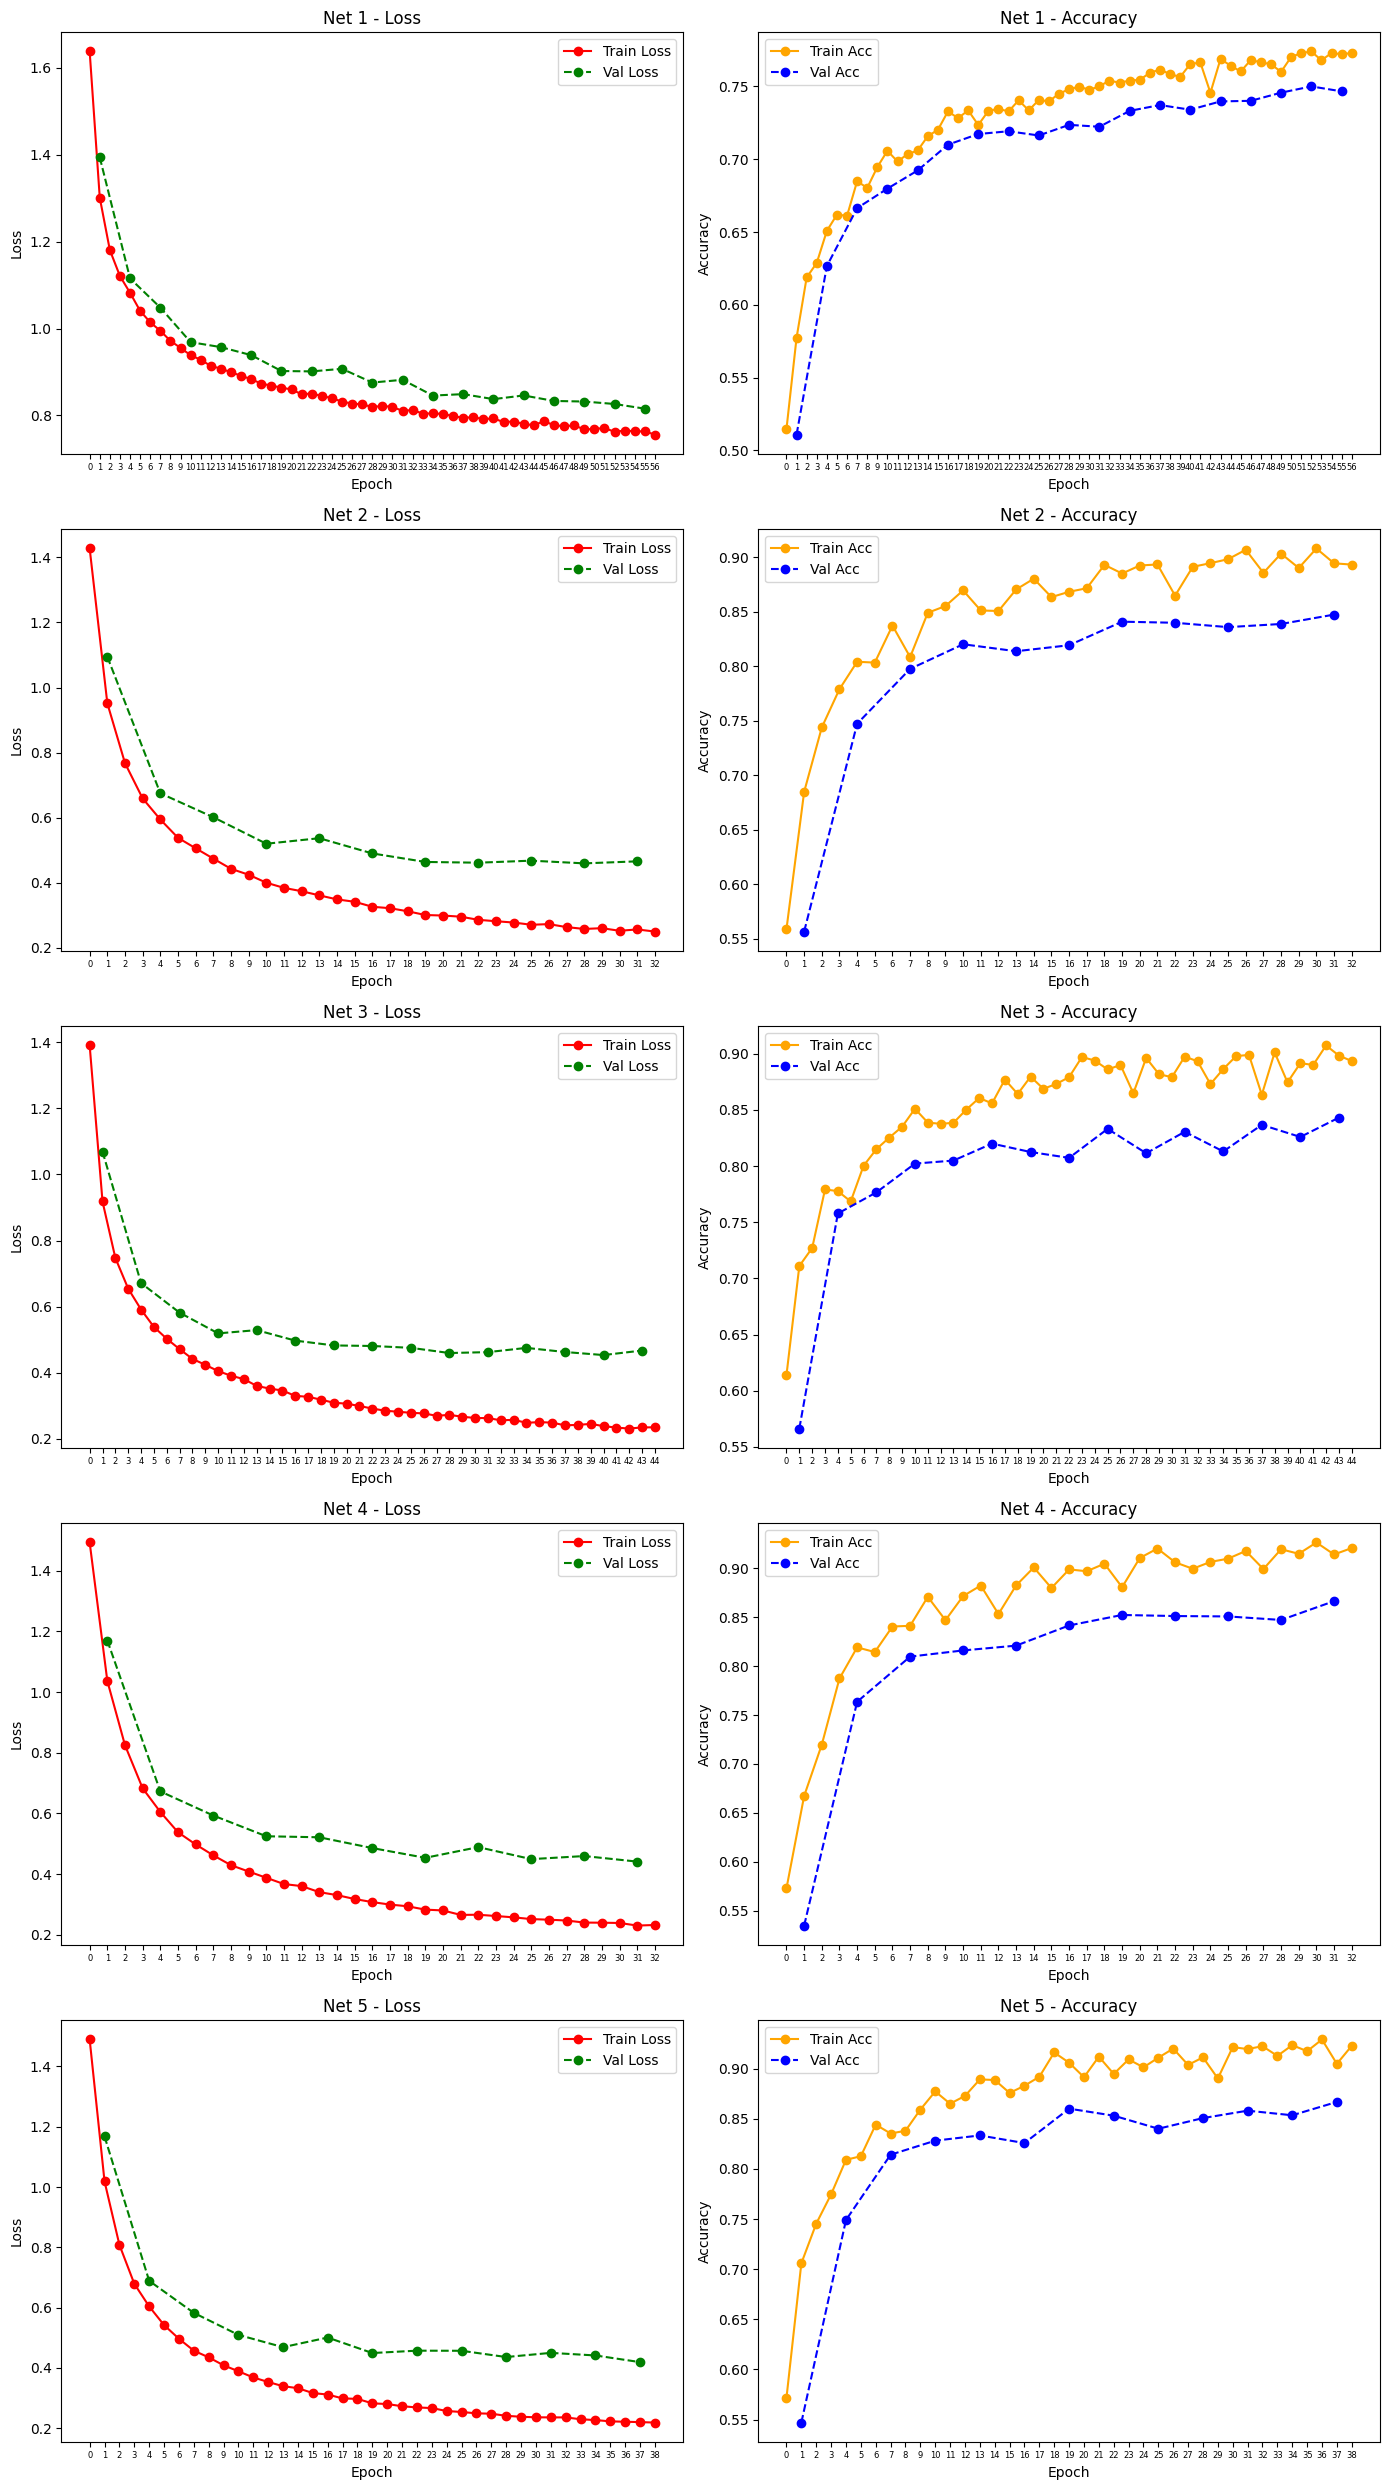

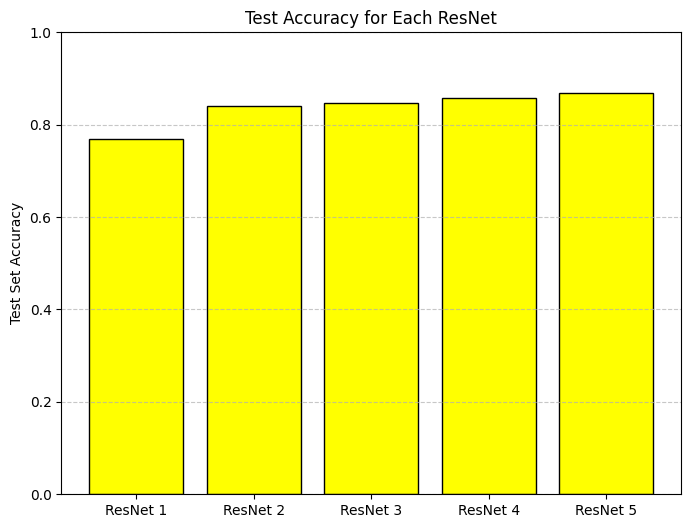

In [26]:
n_models = len(ResNets)
val_check = 3 

fig, axs = plt.subplots(n_models, 2, figsize=(14, 5 * n_models))


for i, history in enumerate(histories):
    epochs_train = list(range(len(history['train_loss'])))
    epochs_val = [e for e in epochs_train if (e + 2) % val_check == 0]

    val_loss = history['val_loss'][:len(epochs_val)]
    val_acc = history['val_acc'][:len(epochs_val)]

    
    axs[i][0].plot(
        epochs_train, history['train_loss'],
        color="red", marker="o", linestyle='-', label='Train Loss'
    )
    axs[i][0].plot(
        epochs_val, val_loss,
        color="green", marker="o", linestyle='--', label='Val Loss'
    )
    axs[i][0].set_xlabel('Epoch')
    axs[i][0].set_ylabel('Loss')
    axs[i][0].set_title(f'Net {i+1} - Loss')
    axs[i][0].legend()
    axs[i][0].set_xticks(epochs_train)
    axs[i][0].tick_params(axis='x', labelsize=6)  

    
    axs[i][1].plot(
        epochs_train, history['train_acc'],
        color="orange", marker="o", linestyle='-', label='Train Acc'
    )
    axs[i][1].plot(
        epochs_val, val_acc,
        color="blue", marker="o", linestyle='--', label='Val Acc'
    )
    axs[i][1].set_xlabel('Epoch')
    axs[i][1].set_ylabel('Accuracy')
    axs[i][1].set_title(f'Net {i+1} - Accuracy')
    axs[i][1].legend()
    axs[i][1].set_xticks(epochs_train)
    axs[i][1].tick_params(axis='x', labelsize=6)

plt.tight_layout()
plt.show()



plt.figure(figsize=(8, 6))
model_labels = [f'ResNet {i+1}' for i in range(len(ResNets))]
plt.bar(model_labels, test_acc_list, color='yellow', edgecolor = 'black')
plt.ylabel('Test Set Accuracy')
plt.title('Test Accuracy for Each ResNet')
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Test set loss: 0.4854, accuracy: 0.8681


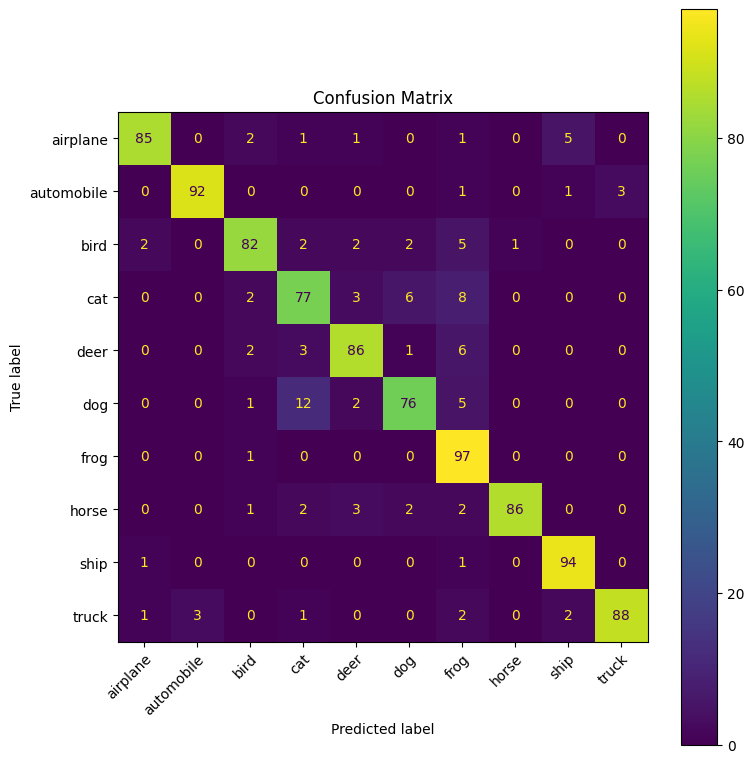

(0.48538104515075686, 0.8681)

In [27]:
best_CNN.test(ds_test,plot = True)

In [28]:
test_acc_list

[0.7695, 0.8407, 0.8468, 0.8568, 0.8681]

-----
## Exercise 2: Choose at Least One

Below are **three** exercises that ask you to deepen your understanding of Deep Networks for visual recognition. You must choose **at least one** of the below for your final submission -- feel free to do **more**, but at least **ONE** you must submit. Each exercise is designed to require you to dig your hands **deep** into the guts of your models in order to do new and interesting things.

**Note**: These exercises are designed to use your small, custom CNNs and small datasets. This is to keep training times reasonable. If you have a decent GPU, feel free to use pretrained ResNets and larger datasets (e.g. the [Imagenette](https://pytorch.org/vision/0.20/generated/torchvision.datasets.Imagenette.html#torchvision.datasets.Imagenette) dataset at 160px).

### Exercise 2.1: *Fine-tune* a pre-trained model
Train one of your residual CNN models from Exercise 1.3 on CIFAR-10. Then:
1. Use the pre-trained model as a **feature extractor** (i.e. to extract the feature activations of the layer input into the classifier) on CIFAR-100. Use a **classical** approach (e.g. Linear SVM, K-Nearest Neighbor, or Bayesian Generative Classifier) from scikit-learn to establish a **stable baseline** performance on CIFAR-100 using the features extracted using your CNN.
2. Fine-tune your CNN on the CIFAR-100 training set and compare with your stable baseline. Experiment with different strategies:
    - Unfreeze some of the earlier layers for fine-tuning.
    - Test different optimizers (Adam, SGD, etc.).

Each of these steps will require you to modify your model definition in some way. For 1, you will need to return the activations of the last fully-connected layer (or the global average pooling layer). For 2, you will need to replace the original, 10-class classifier with a new, randomly-initialized 100-class classifier.

In [24]:

layers_deeper_net = [
    ("Conv2d", 3, 64, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 64),
    ("Conv2d", 64, 64, 3, 1, 1, "zeros", "ReLU"),
    ("Dropout", 0.5),
    ("BatchNorm2d", 64),
    ("MaxPool2d", 2),

    ("Conv2d", 64, 128, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 128),
    ("Conv2d", 128, 128, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 128),
    ("MaxPool2d", 2),

    ("Conv2d", 128, 256, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 256),
    ("Conv2d", 256, 256, 3, 1, 1, "zeros", "ReLU"),
    ("BatchNorm2d", 256),
    ("MaxPool2d", 2),

    ("Linear", 4096, 512, 1, 256, "ReLU"),
    ("Dropout", 0.5),
    ("Linear", 256, 128, 2, 10)
]

best_CNN = MyResNet(layers_deeper_net, data_shape=(3,32,32),skip_dict={1:4,4:7,7:9,9:12,12:14})

In [25]:
best_CNN.load_state_dict(torch.load("/home/tommaso/Documents/deep_learning/bestCNNv2.pth"))
best_CNN_beheaded = best_CNN.get_submodel(22)
best_CNN_beheaded.layers

ModuleList(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): Dropout(p=0.5, inplace=False)
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU()
  (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): ReLU()
  (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (16)

In [26]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4865, 0.4409), (0.2673, 0.2564, 0.2762))  # CIFAR-100 mean/std
])

augment= transforms.Compose([
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1), shear=10),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.2, hue=0.05),
    transforms.ToTensor(),
    transforms.GaussianBlur(3, sigma=(0.1, 2.0)),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.2), ratio=(0.3, 3.3)),
    transforms.Normalize((0.5071, 0.4865, 0.4409), (0.2673, 0.2564, 0.2762))
])


# Dataset train e test
ds_train = CIFAR100(
    root='./data', train=True, download=True, transform=transform
)

ds_test = CIFAR100(
    root='./data', train=False, download=True, transform=transform
)

In [27]:
#####getting data for training the baseline######

batch_size = 64
device = 'cuda'

loader = DataLoader(
        ds_train,
        shuffle=True,
        batch_size=batch_size,
        num_workers=4
        )

seed = 42

random.seed(seed)                     
np.random.seed(seed)                  
torch.manual_seed(seed)               
torch.cuda.manual_seed(seed)          
torch.cuda.manual_seed_all(seed) 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


best_CNN_beheaded.to(device)
best_CNN_beheaded.eval()

MyResNet(
  (layers): ModuleList(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU()
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(128, 256, ker

In [28]:
out_dim = best_CNN_beheaded(torch.zeros(size=[2,3,32,32]).to(device)).shape[1:]
out_dim = torch.flatten(torch.zeros(size=out_dim)).shape[0]
out_dim

4096

In [29]:
Y_train = np.zeros(len(ds_train))
X_train = np.zeros([len(ds_train), out_dim]) 
n_batch = 0
j = 0
for x,y in loader:
    
    tail = int(y.shape[0])
    Y_train[j:j+tail] = y.numpy()
    
    x = x.to(device)
    with torch.no_grad():
        out = best_CNN_beheaded(x)
    
    j = n_batch*batch_size
    for i in range(list(out.shape)[0]):
       
        image = out[i]

        features = image.view(-1).cpu().numpy()
        index = j+i

        X_train[index,:] = features  
    n_batch += 1  

In [30]:
loader = DataLoader(
        ds_test,
        shuffle=True,
        batch_size=batch_size,
        num_workers=4
        )
Y_test = np.zeros(len(ds_test))
X_test = np.zeros([len(ds_test), out_dim])
n_batch = 0
j = 0
for x,y in loader:
    
    tail = int(y.shape[0])
    Y_test[j:j+tail] = y.numpy()
    
    x = x.to(device)
    with torch.no_grad():
        out = best_CNN_beheaded(x)
    
    j = n_batch*batch_size
    for i in range(list(out.shape)[0]):
       
        image = out[i]
        features = image.view(-1).cpu().numpy()
        index = j+i

        X_test[index,:] = features  
    n_batch += 1  

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score

# X_train, y_train, X_test, y_test già pronti

knn = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=100, metric='euclidean')
)

knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

print(f"Accuracy: {accuracy_score(Y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(Y_test, y_pred, digits=3))

Accuracy: 0.0101

Classification Report:
              precision    recall  f1-score   support

         0.0      0.017     0.031     0.022       163
         1.0      0.000     0.000     0.000       100
         2.0      0.014     0.041     0.021        98
         3.0      0.005     0.020     0.008        99
         4.0      0.008     0.020     0.012        99
         5.0      0.028     0.010     0.015       100
         6.0      0.000     0.000     0.000       100
         7.0      0.021     0.010     0.014       100
         8.0      0.000     0.000     0.000        99
         9.0      0.007     0.010     0.008        99
        10.0      0.012     0.020     0.015        99
        11.0      0.018     0.030     0.022       100
        12.0      0.010     0.172     0.020        99
        13.0      0.009     0.010     0.010        99
        14.0      0.033     0.010     0.015       100
        15.0      0.000     0.000     0.000        99
        16.0      0.000     0.000     0.

In [32]:
####build the classifier head###

classifier_layers = [
    ("Linear", 4096, 1024, 2, 512,'ReLU'),  
    ("Dropout", 0.8, "ReLU"),
    ("Linear", 512, 128, 2, 100, None)              
] 
best_CNN.load_state_dict(torch.load("/home/tommaso/Documents/deep_learning/bestCNNv2.pth", weights_only = True)) 
best_CNN_beheaded = best_CNN.get_submodel(22)
best_CNN_beheaded.skips={1:4,4:7,7:9,9:12}


best_CNN_beheaded.layers.append(MyResNet(classifier_layers))

device = 'cuda'
best_CNN_beheaded = best_CNN_beheaded.to(device)


ResNet_CIFAR100 = best_CNN_beheaded

In [33]:
ResNet_CIFAR100.layers

ModuleList(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): Dropout(p=0.5, inplace=False)
  (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU()
  (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): ReLU()
  (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (16)

In [34]:
from torch.optim import SGD, Adam

trainer_config = {
    "device": 'cuda', 
    "num_workers": 4, 
    "seed": 10
}



model = ResNet_CIFAR100 

#=== Step 3: fine-tuning di tutta la rete con ADAM  ===
optimizer3 = optimizer2 = Adam(model.parameters())


trainer3 = Trainer(config=trainer_config, model=model, lr=5e-5,optimizer=optimizer3, dataset=ds_train)

trainer3.fine_tune(
    layers_to_unfreeze=list(range(0, 32)),
    data_split=[0.2, 0.8],
    batch_size=256,
    num_epochs=20,
    early_stopping=1,
    val_check=3,
    augmentation=[0.4,augment],
    use_wandb=False,
    checks=False
)

# === Step 2: fine-tuning su alcuni layer convoluzionali ===
optimizer2 = SGD(model.parameters(), momentum=0.9, weight_decay=1e-4)
trainer2 = Trainer(config=trainer_config,lr=1e-4, model=model, optimizer=optimizer2, dataset=ds_train)

trainer2.fine_tune(
    layers_to_unfreeze=list(range(11,32)),
    data_split=[0.2, 0.8],
    batch_size=256,
    num_epochs=20,
    early_stopping=3,
    val_check=2,
    augmentation=[0.4,augment],
    use_wandb=False,
    checks=False
)

# === Step 1: fine-tuning solo sui layer lineari ===
optimizer1 = SGD(model.parameters(), momentum=0.6, weight_decay=1e-4)
trainer1 = Trainer(config=trainer_config,lr=1e-3, model=model, optimizer=optimizer1, dataset=ds_train)

trainer1.fine_tune(
    layers_to_unfreeze=list(range(22,32)),
    data_split=[0.2, 0.8],
    batch_size=256,
    num_epochs=20,
    early_stopping=2,
    val_check=3,
    augmentation=[0.4,augment],
    use_wandb=False,
    checks=False
)

running on device cuda
[Fine-tune] Unfreezing layer indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


Training epoch 0: 100%|██████████| 219/219 [00:11<00:00, 18.27it/s]

Epoch 0/20, Average training loss: 4.1212


Epoch 0/20, Training accuracy: 0.1102


Validation epoch 0: 100%|██████████| 40/40 [00:02<00:00, 17.52it/s]

Epoch 0/20, Average validation loss: 3.7375


Epoch 0/20, Validation accuracy: 0.1074


Training epoch 1: 100%|██████████| 219/219 [00:11<00:00, 18.50it/s]

Epoch 1/20, Average training loss: 3.4696


Epoch 1/20, Training accuracy: 0.2135


Training epoch 2: 100%|██████████| 219/219 [00:11<00:00, 18.32it/s]

Epoch 2/20, Average training loss: 3.1340


Epoch 2/20, Training accuracy: 0.2668


Training epoch 3: 100%|██████████| 219/219 [00:12<00:00, 18.13it/s]

Epoch 3/20, Average training loss: 2.9138


Epoch 3/20, Training accuracy: 0.2984


Validation epoch 3: 100%|██████████| 40/40 [00:02<00:00, 18.27it/s]

Epoch 3/20, Average validation loss: 2.9624


Epoch 3/20, Validation accuracy: 0.2730


Training epoch 4: 100%|██████████| 219/219 [00:11<00:00, 18.30it/s]

Epoch 4/20, Average training loss: 2.7343


Epoch 4/20, Training accuracy: 0.3256


Training epoch 5: 100%|██████████| 219/219 [00:12<00:00, 18.03it/s]

Epoch 5/20, Average training loss: 2.5999


Epoch 5/20, Training accuracy: 0.3659


Training epoch 6: 100%|██████████| 219/219 [00:12<00:00, 17.57it/s]

Epoch 6/20, Average training loss: 2.4831


Epoch 6/20, Training accuracy: 0.3786


Validation epoch 6: 100%|██████████| 40/40 [00:02<00:00, 16.77it/s]

Epoch 6/20, Average validation loss: 2.6778


Epoch 6/20, Validation accuracy: 0.3427


Training epoch 7: 100%|██████████| 219/219 [00:12<00:00, 17.67it/s]

Epoch 7/20, Average training loss: 2.3917


Epoch 7/20, Training accuracy: 0.4069


Training epoch 8: 100%|██████████| 219/219 [00:12<00:00, 17.27it/s]

Epoch 8/20, Average training loss: 2.3032


Epoch 8/20, Training accuracy: 0.4257


Training epoch 9: 100%|██████████| 219/219 [00:12<00:00, 17.11it/s]

Epoch 9/20, Average training loss: 2.2176


Epoch 9/20, Training accuracy: 0.4670


Validation epoch 9: 100%|██████████| 40/40 [00:02<00:00, 16.85it/s]

Epoch 9/20, Average validation loss: 2.5508


Epoch 9/20, Validation accuracy: 0.3805


Training epoch 10: 100%|██████████| 219/219 [00:12<00:00, 17.22it/s]

Epoch 10/20, Average training loss: 2.1407


Epoch 10/20, Training accuracy: 0.4690


Training epoch 11: 100%|██████████| 219/219 [00:13<00:00, 16.61it/s]

Epoch 11/20, Average training loss: 2.0773


Epoch 11/20, Training accuracy: 0.4836


Training epoch 12: 100%|██████████| 219/219 [00:13<00:00, 16.39it/s]

Epoch 12/20, Average training loss: 2.0188


Epoch 12/20, Training accuracy: 0.4961


Validation epoch 12: 100%|██████████| 40/40 [00:02<00:00, 16.88it/s]

Epoch 12/20, Average validation loss: 2.4984


Epoch 12/20, Validation accuracy: 0.4033


Training epoch 13: 100%|██████████| 219/219 [00:13<00:00, 16.51it/s]

Epoch 13/20, Average training loss: 1.9500


Epoch 13/20, Training accuracy: 0.4970


Training epoch 14: 100%|██████████| 219/219 [00:13<00:00, 16.84it/s]

Epoch 14/20, Average training loss: 1.9041


Epoch 14/20, Training accuracy: 0.5277


Training epoch 15: 100%|██████████| 219/219 [00:13<00:00, 16.78it/s]

Epoch 15/20, Average training loss: 1.8492


Epoch 15/20, Training accuracy: 0.5079


Validation epoch 15: 100%|██████████| 40/40 [00:02<00:00, 15.63it/s]

Epoch 15/20, Average validation loss: 2.4456


Epoch 15/20, Validation accuracy: 0.4053


Training epoch 16: 100%|██████████| 219/219 [00:13<00:00, 16.37it/s]

Epoch 16/20, Average training loss: 1.7998


Epoch 16/20, Training accuracy: 0.5239


Training epoch 17: 100%|██████████| 219/219 [00:13<00:00, 16.50it/s]

Epoch 17/20, Average training loss: 1.7557


Epoch 17/20, Training accuracy: 0.5424


Training epoch 18: 100%|██████████| 219/219 [00:13<00:00, 16.15it/s]

Epoch 18/20, Average training loss: 1.7124


Epoch 18/20, Training accuracy: 0.5622


Validation epoch 18: 100%|██████████| 40/40 [00:02<00:00, 16.22it/s]

Epoch 18/20, Average validation loss: 2.3853


Epoch 18/20, Validation accuracy: 0.4227


Training epoch 19: 100%|██████████| 219/219 [00:13<00:00, 16.35it/s]

Epoch 19/20, Average training loss: 1.6611


Epoch 19/20, Training accuracy: 0.5434
running on device cuda
[Fine-tune] Unfreezing layer indices: [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


Training epoch 0: 100%|██████████| 219/219 [00:13<00:00, 16.30it/s]

Epoch 0/20, Average training loss: 1.5367


Epoch 0/20, Training accuracy: 0.5612


Validation epoch 0: 100%|██████████| 40/40 [00:02<00:00, 15.68it/s]

Epoch 0/20, Average validation loss: 2.3521


Epoch 0/20, Validation accuracy: 0.4340


Training epoch 1: 100%|██████████| 219/219 [00:13<00:00, 15.96it/s]

Epoch 1/20, Average training loss: 1.5000


Epoch 1/20, Training accuracy: 0.5697


Training epoch 2: 100%|██████████| 219/219 [00:13<00:00, 16.08it/s]

Epoch 2/20, Average training loss: 1.4795


Epoch 2/20, Training accuracy: 0.5696


Validation epoch 2: 100%|██████████| 40/40 [00:02<00:00, 15.64it/s]

Epoch 2/20, Average validation loss: 2.3282


Epoch 2/20, Validation accuracy: 0.4396


Training epoch 3: 100%|██████████| 219/219 [00:13<00:00, 16.09it/s]

Epoch 3/20, Average training loss: 1.4638


Epoch 3/20, Training accuracy: 0.5714


Training epoch 4: 100%|██████████| 219/219 [00:13<00:00, 16.73it/s]

Epoch 4/20, Average training loss: 1.4277


Epoch 4/20, Training accuracy: 0.5737


Validation epoch 4: 100%|██████████| 40/40 [00:02<00:00, 16.21it/s]

Epoch 4/20, Average validation loss: 2.3080


Epoch 4/20, Validation accuracy: 0.4338


Training epoch 5: 100%|██████████| 219/219 [00:13<00:00, 16.06it/s]

Epoch 5/20, Average training loss: 1.4275


Epoch 5/20, Training accuracy: 0.5737


Training epoch 6: 100%|██████████| 219/219 [00:13<00:00, 16.48it/s]

Epoch 6/20, Average training loss: 1.4066


Epoch 6/20, Training accuracy: 0.5794


Validation epoch 6: 100%|██████████| 40/40 [00:02<00:00, 15.77it/s]

Epoch 6/20, Average validation loss: 2.3477


Epoch 6/20, Validation accuracy: 0.4390


Training epoch 7: 100%|██████████| 219/219 [00:13<00:00, 16.05it/s]

Epoch 7/20, Average training loss: 1.3923


Epoch 7/20, Training accuracy: 0.5792


Training epoch 8: 100%|██████████| 219/219 [00:13<00:00, 16.24it/s]

Epoch 8/20, Average training loss: 1.3838


Epoch 8/20, Training accuracy: 0.5819


Validation epoch 8: 100%|██████████| 40/40 [00:02<00:00, 15.81it/s]

Epoch 8/20, Average validation loss: 2.3302


Epoch 8/20, Validation accuracy: 0.4330


Training epoch 9: 100%|██████████| 219/219 [00:13<00:00, 16.73it/s]

Epoch 9/20, Average training loss: 1.3549


Epoch 9/20, Training accuracy: 0.5787


Training epoch 10: 100%|██████████| 219/219 [00:13<00:00, 16.08it/s]

Epoch 10/20, Average training loss: 1.3368


Epoch 10/20, Training accuracy: 0.5806


Validation epoch 10: 100%|██████████| 40/40 [00:02<00:00, 15.37it/s]

Epoch 10/20, Average validation loss: 2.3348


Epoch 10/20, Validation accuracy: 0.4421


Training epoch 11: 100%|██████████| 219/219 [00:13<00:00, 16.11it/s]

Epoch 11/20, Average training loss: 1.3155


Epoch 11/20, Training accuracy: 0.5817


Training epoch 12: 100%|██████████| 219/219 [00:13<00:00, 15.83it/s]

Epoch 12/20, Average training loss: 1.3054


Epoch 12/20, Training accuracy: 0.5821


Validation epoch 12: 100%|██████████| 40/40 [00:02<00:00, 15.75it/s]

Epoch 12/20, Average validation loss: 2.3102


Epoch 12/20, Validation accuracy: 0.4402


Training epoch 13: 100%|██████████| 219/219 [00:13<00:00, 16.05it/s]

Epoch 13/20, Average training loss: 1.2769


Epoch 13/20, Training accuracy: 0.5819


Training epoch 14: 100%|██████████| 219/219 [00:13<00:00, 16.13it/s]

Epoch 14/20, Average training loss: 1.2600


Epoch 14/20, Training accuracy: 0.5870


Validation epoch 14: 100%|██████████| 40/40 [00:02<00:00, 16.14it/s]

Epoch 14/20, Average validation loss: 2.3229


Epoch 14/20, Validation accuracy: 0.4485


Training epoch 15: 100%|██████████| 219/219 [00:13<00:00, 16.50it/s]

Epoch 15/20, Average training loss: 1.2371


Epoch 15/20, Training accuracy: 0.5892


Training epoch 16: 100%|██████████| 219/219 [00:13<00:00, 16.29it/s]

Epoch 16/20, Average training loss: 1.2173


Epoch 16/20, Training accuracy: 0.5842


Validation epoch 16: 100%|██████████| 40/40 [00:02<00:00, 16.08it/s]

Epoch 16/20, Average validation loss: 2.3813


Epoch 16/20, Validation accuracy: 0.4320
Early stopping triggered!
running on device cuda
[Fine-tune] Unfreezing layer indices: [22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


Training epoch 0: 100%|██████████| 219/219 [00:13<00:00, 15.99it/s]

Epoch 0/20, Average training loss: 1.3922


Epoch 0/20, Training accuracy: 0.5839


Validation epoch 0: 100%|██████████| 40/40 [00:02<00:00, 16.38it/s]

Epoch 0/20, Average validation loss: 2.3640


Epoch 0/20, Validation accuracy: 0.4451


Training epoch 1: 100%|██████████| 219/219 [00:12<00:00, 17.10it/s]

Epoch 1/20, Average training loss: 1.3849


Epoch 1/20, Training accuracy: 0.5866


Training epoch 2: 100%|██████████| 219/219 [00:13<00:00, 16.62it/s]

Epoch 2/20, Average training loss: 1.3792


Epoch 2/20, Training accuracy: 0.5847


Training epoch 3: 100%|██████████| 219/219 [00:12<00:00, 16.89it/s]

Epoch 3/20, Average training loss: 1.3726


Epoch 3/20, Training accuracy: 0.5877


Validation epoch 3: 100%|██████████| 40/40 [00:02<00:00, 16.65it/s]

Epoch 3/20, Average validation loss: 2.3491


Epoch 3/20, Validation accuracy: 0.4483


Training epoch 4: 100%|██████████| 219/219 [00:13<00:00, 16.79it/s]

Epoch 4/20, Average training loss: 1.3432


Epoch 4/20, Training accuracy: 0.5910


Training epoch 5: 100%|██████████| 219/219 [00:13<00:00, 16.72it/s]

Epoch 5/20, Average training loss: 1.3391


Epoch 5/20, Training accuracy: 0.5860


Training epoch 6: 100%|██████████| 219/219 [00:13<00:00, 16.50it/s]

Epoch 6/20, Average training loss: 1.3161


Epoch 6/20, Training accuracy: 0.5905


Validation epoch 6: 100%|██████████| 40/40 [00:02<00:00, 15.76it/s]

Epoch 6/20, Average validation loss: 2.3406


Epoch 6/20, Validation accuracy: 0.4410


Training epoch 7: 100%|██████████| 219/219 [00:12<00:00, 17.43it/s]

Epoch 7/20, Average training loss: 1.2926


Epoch 7/20, Training accuracy: 0.5889


Training epoch 8: 100%|██████████| 219/219 [00:12<00:00, 17.63it/s]

Epoch 8/20, Average training loss: 1.2867


Epoch 8/20, Training accuracy: 0.5908


Training epoch 9: 100%|██████████| 219/219 [00:13<00:00, 16.57it/s]

Epoch 9/20, Average training loss: 1.2588


Epoch 9/20, Training accuracy: 0.5865


Validation epoch 9: 100%|██████████| 40/40 [00:02<00:00, 17.06it/s]

Epoch 9/20, Average validation loss: 2.3586


Epoch 9/20, Validation accuracy: 0.4452
Early stopping triggered!


In [35]:
ResNet_CIFAR100.test(ds_test,256)

Test set loss: 1.9734, accuracy: 0.5392


(1.9733905405044556, 0.5392)

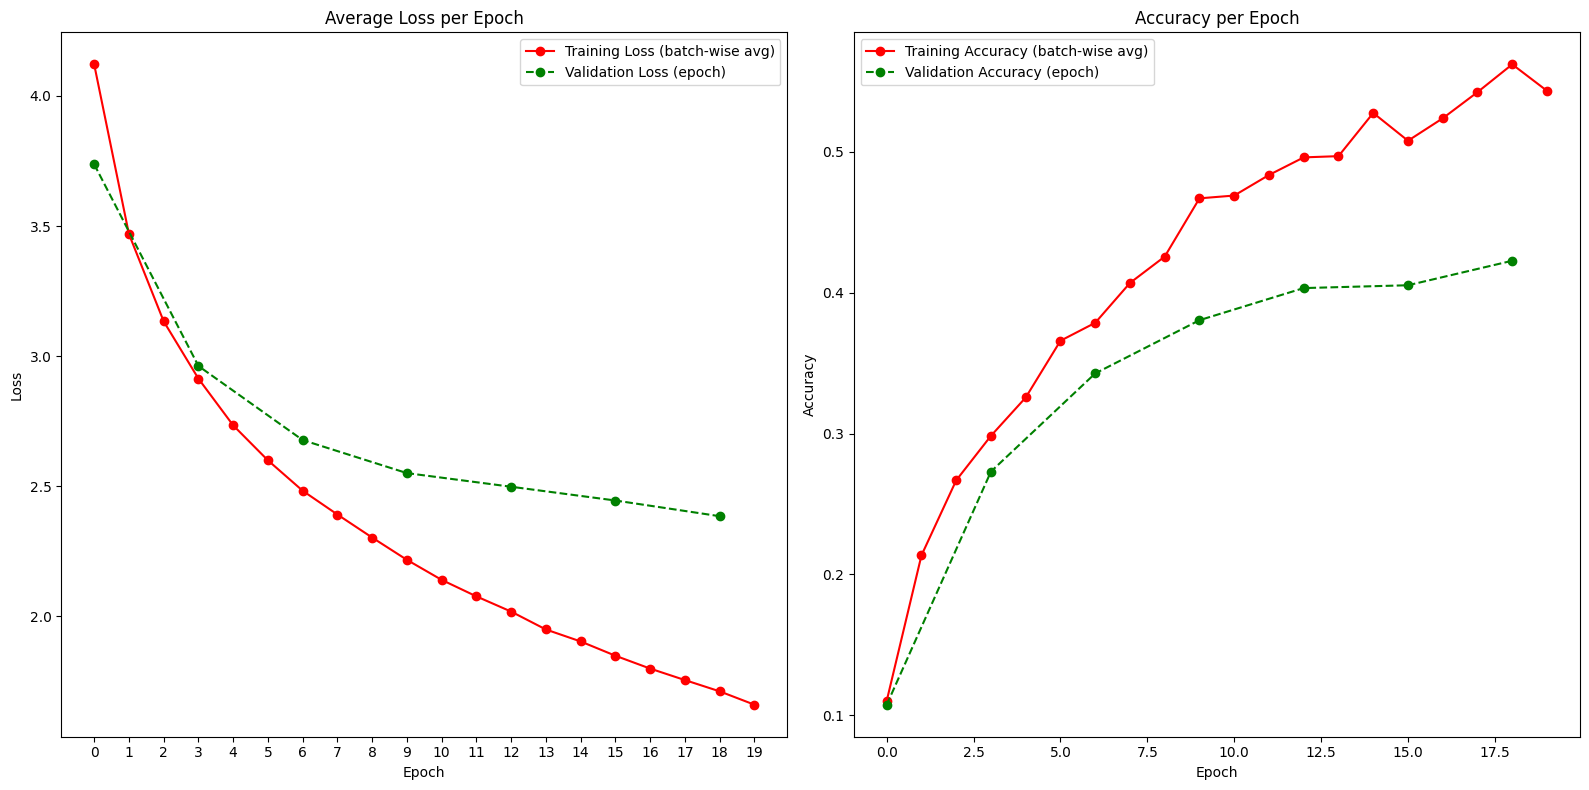

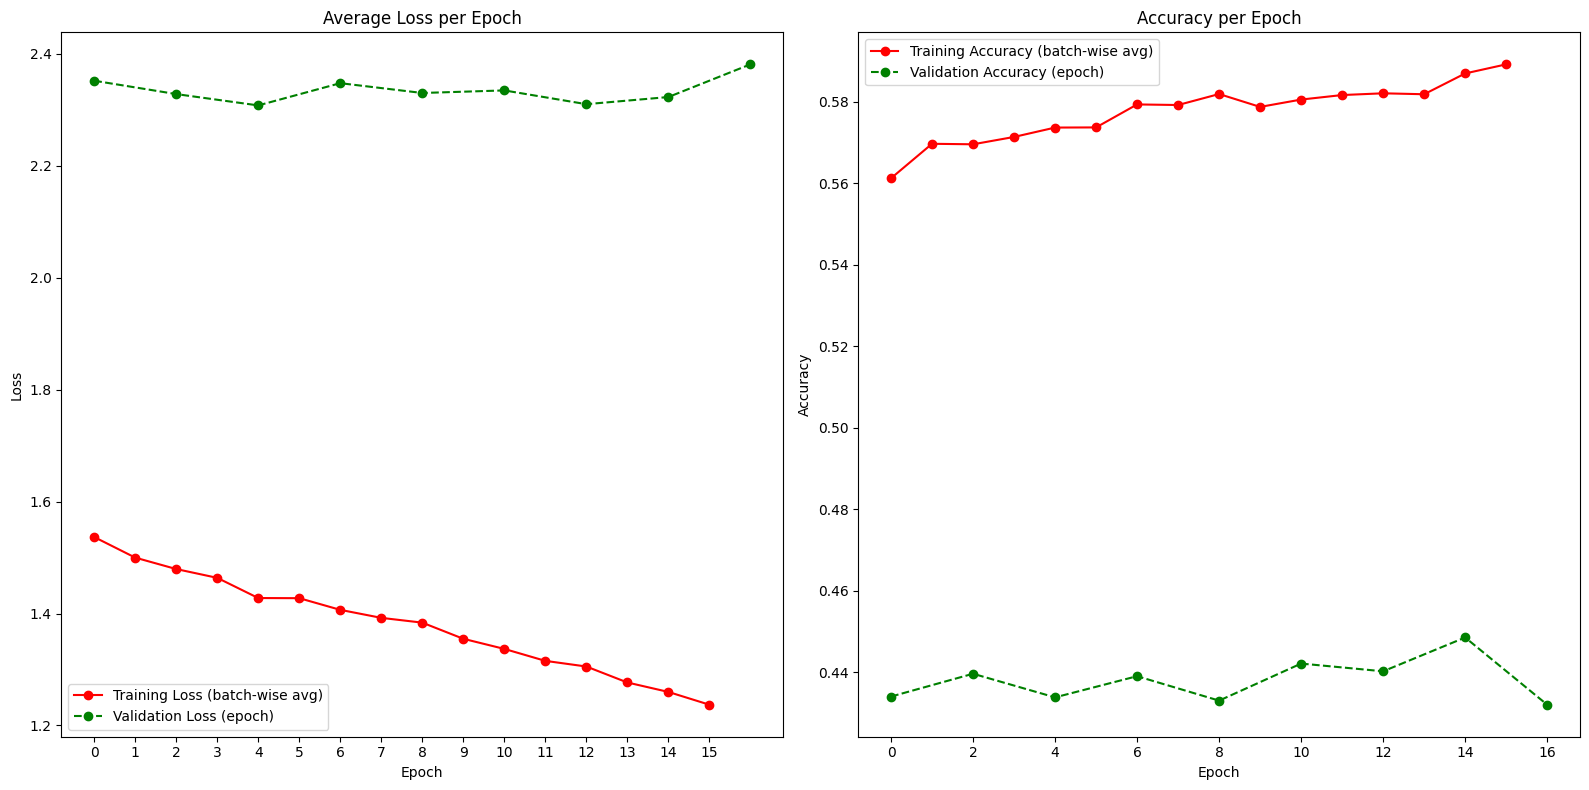

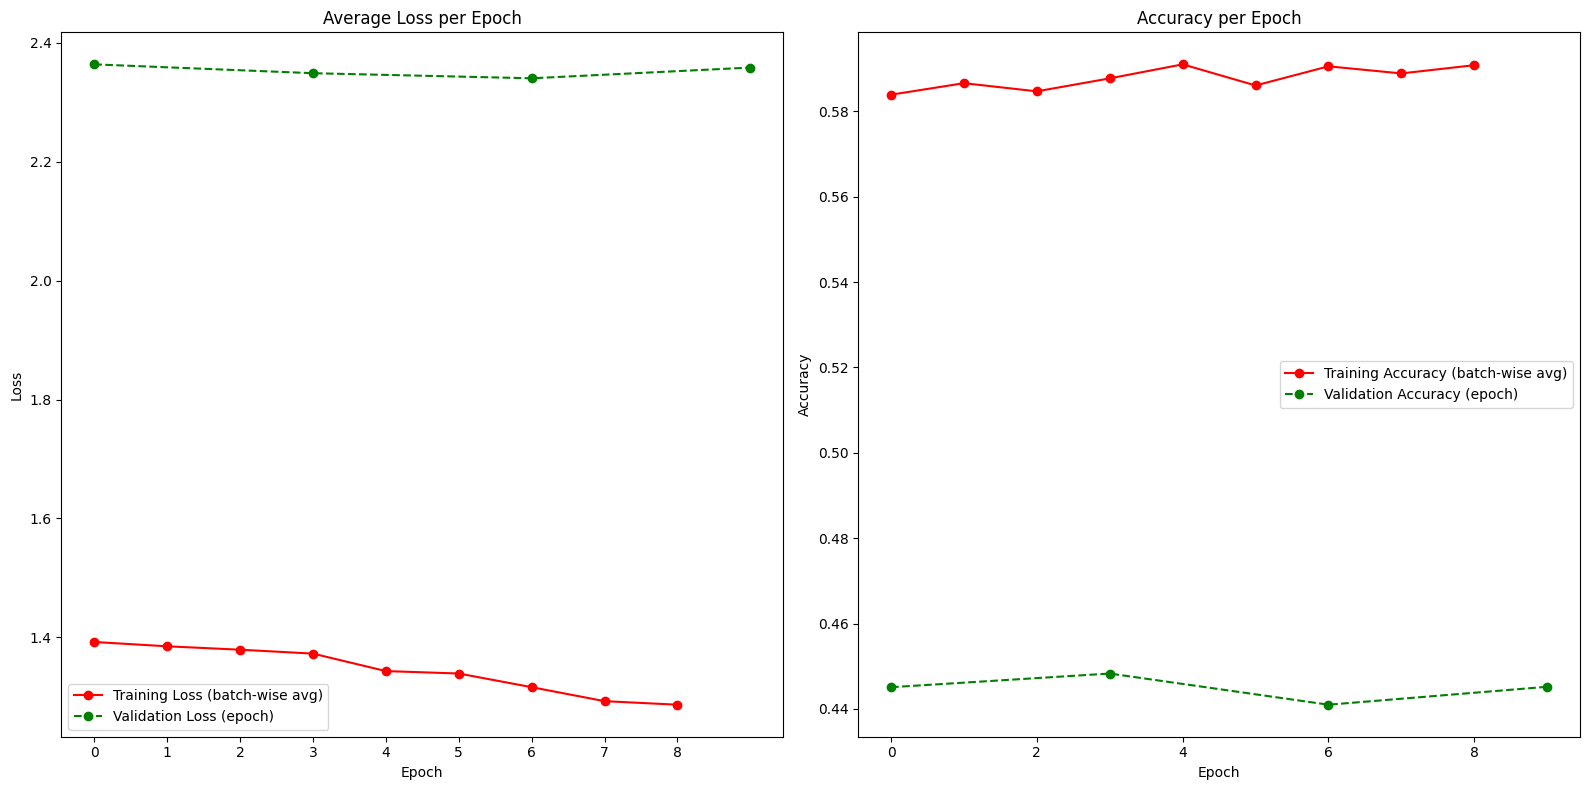

In [36]:
trainer3.plot_curves()
trainer2.plot_curves()
trainer1.plot_curves()

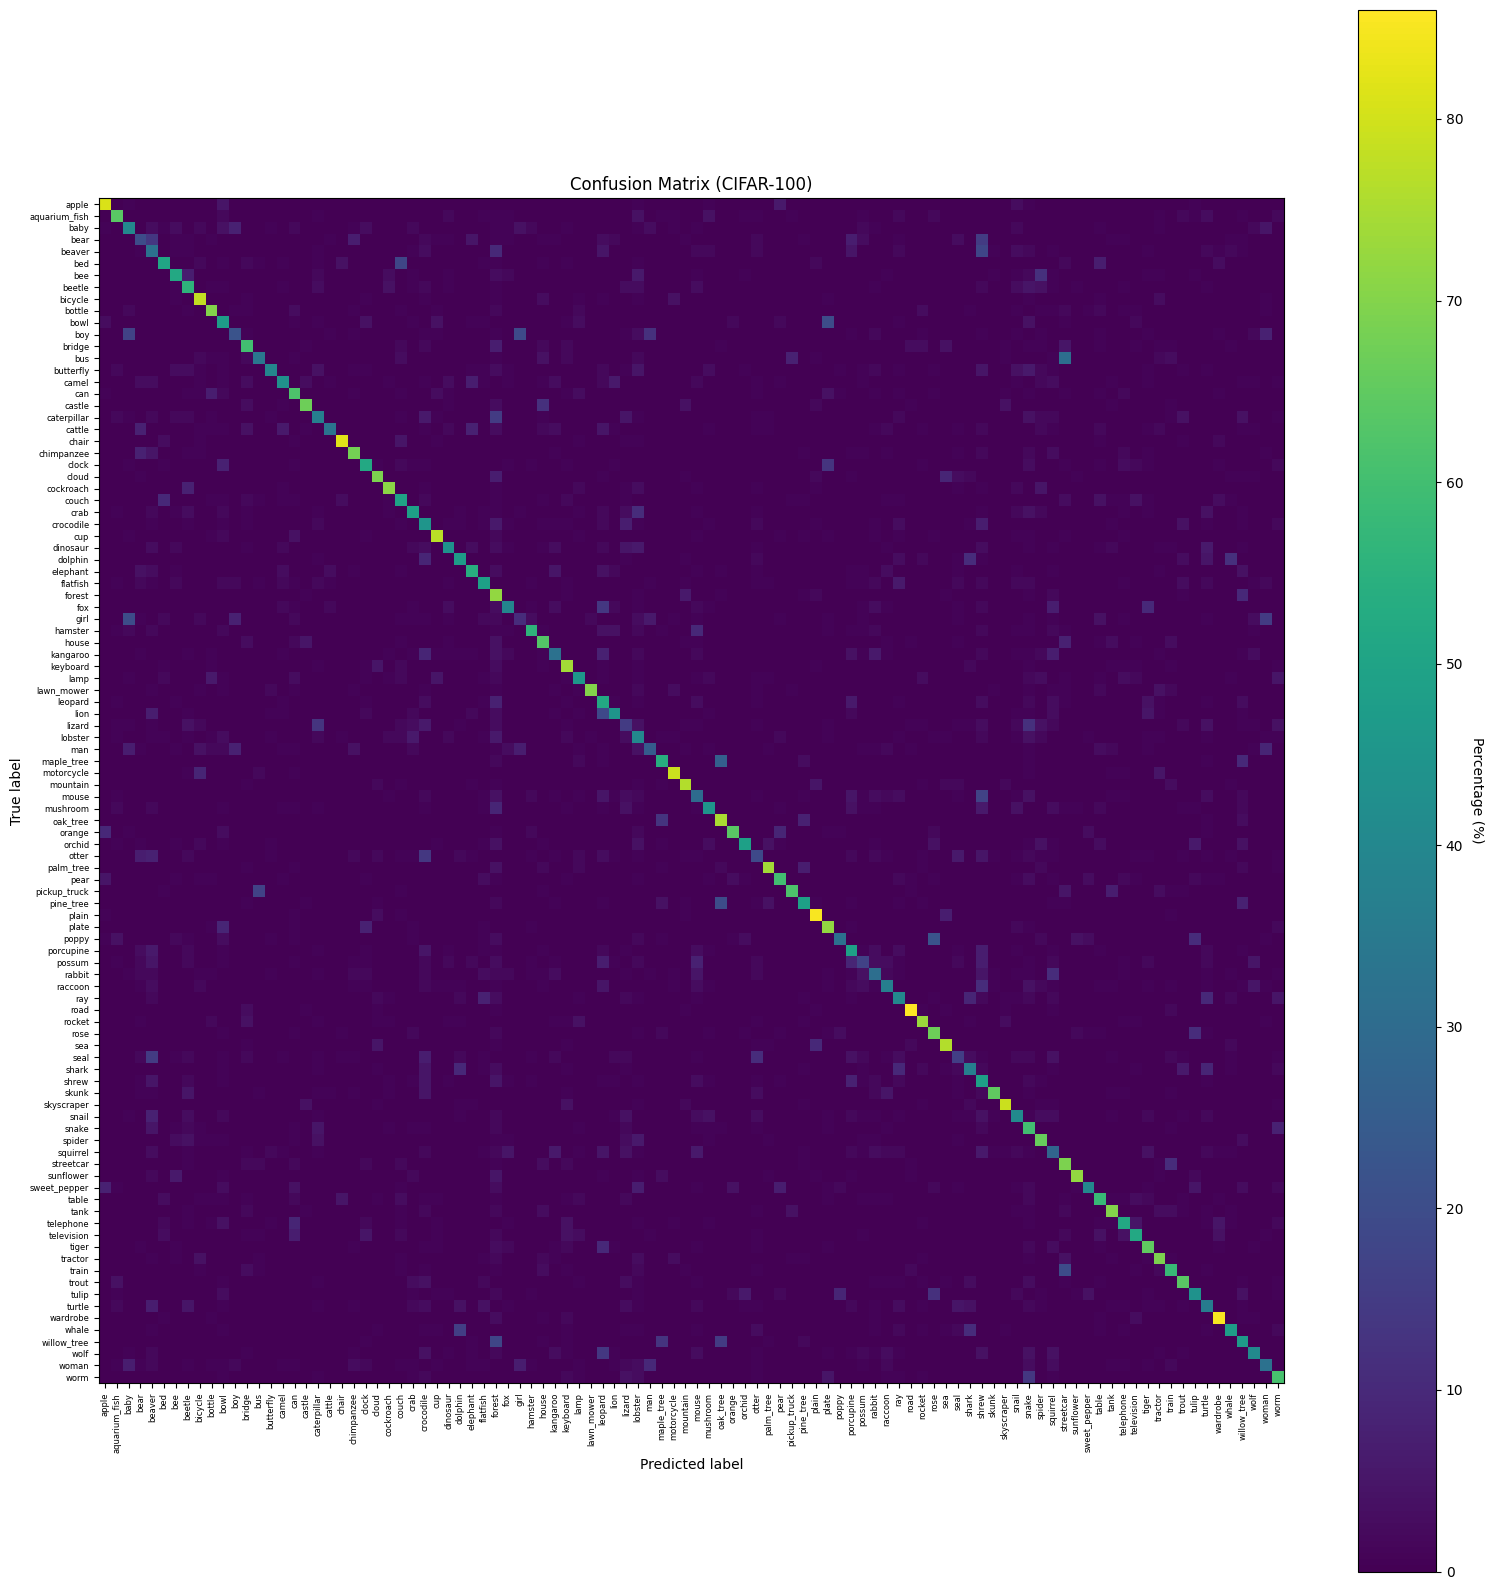

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ResNet_CIFAR100.eval()

loader = DataLoader(ds_test, batch_size=256, shuffle=False, num_workers=2)
loss_fn=torch.nn.CrossEntropyLoss() 
correct = 0

y_pred = []
y_true = []
with torch.no_grad():
    for xs, ys in loader:
        xs, ys = xs.to(device), ys.to(device)
        logits = ResNet_CIFAR100(xs)
        loss = loss_fn(logits, ys)
        preds = torch.argmax(logits, dim=1)
        correct += (preds == ys).sum().item()
                
        y_pred.extend(preds.cpu().tolist())
        y_true.extend(ys.cpu().tolist())



cm = confusion_matrix(np.array(y_true), np.array(y_pred))
cmn = cm.astype(np.float32)
cmn /= cmn.sum(1, keepdims=True)
cmn = (100 * cmn).astype(np.int32)

fig, ax = plt.subplots(figsize=(16, 16))  # figura più grande
im = ax.imshow(cmn, interpolation='nearest', cmap='viridis')

# Colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Percentage (%)", rotation=270, labelpad=15)

# Etichette
ax.set_xticks(np.arange(len(ds_test.classes)))
ax.set_yticks(np.arange(len(ds_test.classes)))
ax.set_xticklabels(ds_test.classes, fontsize=6, rotation=90)
ax.set_yticklabels(ds_test.classes, fontsize=6)

ax.set_ylabel("True label")
ax.set_xlabel("Predicted label")
ax.set_title("Confusion Matrix (CIFAR-100)")

plt.tight_layout()
plt.show()


### Exercise 2.2: *Distill* the knowledge from a large model into a smaller one
In this exercise you will see if you can derive a *small* model that performs comparably to a larger one on CIFAR-10. To do this, you will use [Knowledge Distillation](https://arxiv.org/abs/1503.02531):

> Geoffrey Hinton, Oriol Vinyals, and Jeff Dean. Distilling the Knowledge in a Neural Network, NeurIPS 2015.

To do this:
1. Train one of your best-performing CNNs on CIFAR-10 from Exercise 1.3 above. This will be your **teacher** model.
2. Define a *smaller* variant with about half the number of parameters (change the width and/or depth of the network). Train it on CIFAR-10 and verify that it performs *worse* than your **teacher**. This small network will be your **student** model.
3. Train the **student** using a combination of **hard labels** from the CIFAR-10 training set (cross entropy loss) and **soft labels** from predictions of the **teacher** (Kulback-Leibler loss between teacher and student).

Try to optimize training parameters in order to maximize the performance of the student. It should at least outperform the student trained only on hard labels in Setp 2.

**Tip**: You can save the predictions of the trained teacher network on the training set and adapt your dataloader to provide them together with hard labels. This will **greatly** speed up training compared to performing a forward pass through the teacher for each batch of training.

In [37]:
# Your code here.

### Exercise 2.3: *Explain* the predictions of a CNN

Use the CNN model you trained in Exercise 1.3 and implement [*Class Activation Maps*](http://cnnlocalization.csail.mit.edu/#:~:text=A%20class%20activation%20map%20for,decision%20made%20by%20the%20CNN.):

> B. Zhou, A. Khosla, A. Lapedriza, A. Oliva, and A. Torralba. Learning Deep Features for Discriminative Localization. CVPR'16 (arXiv:1512.04150, 2015).

Use your CNN implementation to demonstrate how your trained CNN *attends* to specific image features to recognize *specific* classes. Try your implementation out using a pre-trained ResNet-18 model and some images from the [Imagenette](https://pytorch.org/vision/0.20/generated/torchvision.datasets.Imagenette.html#torchvision.datasets.Imagenette) dataset -- I suggest you start with the low resolution version of images at 160px.

In [38]:
# Your code here.